# Springboard Time Series - 'Cowboy Cigarettes' Case Study - Tier 3

## Brief

You're working in the US federal government as a data scientist in the Health and Environment department. You've been tasked with determining whether sales for the oldest and most powerful producers of cigarettes in the country are increasing or declining. 

**Cowboy Cigarettes (TM, *est.* 1890)** is the US's longest-running cigarette manufacturer. Like many cigarette companies, however, they haven't always been that public about their sales and marketing data. The available post-war historical data runs for only 11 years after they resumed production in 1949; stopping in 1960 before resuming again in 1970. Your job is to use the 1949-1960 data to predict whether the manufacturer's cigarette sales actually increased, decreased, or stayed the same. You need to make a probable reconstruction of the sales record of the manufacturer - predicting the future, from the perspective of the past - to contribute to a full report on US public health in relation to major cigarette companies. 

The results of your analysis will be used as part of a major report relating public health and local economics, and will be combined with other studies executed by your colleagues to provide important government advice.  

-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest.  

**1. Sourcing and loading** 
- Load relevant libraries 
- Load the data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Dropping unwanted columns
- Nomenclature
- Type conversions
- Making a predictor variable `y` 
- Getting summary statistics for `y`
- Plotting `y`
  
  
**3. Modelling** 
- Decomposition
    - Trend
    - Seasonality
    - Noise
- Testing for stationarity with KPSS
- Making the data stationary
- The ARIMA Model
    - Make a function to find the MSE of a single ARIMA model
    - Make a function to evaluate the different ARIMA models with different p, d, and q values
- Visualize the results
- Application: Forecasting

**4. Evaluating and concluding** 
- What is our conclusion?
- Next steps
    

## 0. Preliminaries 

Time series data is just any data displaying how a single variable changes over time. It comes as a collection of metrics typically taken at regular intervals. Common examples of time series data include weekly sales data and daily stock prices. You can also easily acquire time series data from [Google Trends](https://trends.google.com/trends/?geo=US), which shows you how popular certain search terms are, measured in number of Google searches. 

## 1. Sourcing and Loading

### 1a. Load relevant libraries 

In [ ]:
#nicee, blanks. like how they're finally giving us some space/freedom/challenge to truly do/figure out on own!

In [1]:
import pandas as pd

### 1b. Load the data
Call the variable `cigData`. 

In [3]:
cigData = pd.read_csv('CowboyCigsData.csv')

### 1c. Explore the data
We now need to check whether the data conduces to a time series style analysis.

In [5]:
cigData

,Unnamed: 0,Time,#CigSales
0,0,1949-01,1000112
1,1,1949-02,1000118
2,2,1949-03,1000132
3,3,1949-04,1000129
4,4,1949-05,1000121
...,...,...,...
139,139,1960-08,1000606
140,140,1960-09,1000508
141,141,1960-10,1000461
142,142,1960-11,1000390


In [ ]:
#so cig sales for each month in this 12 year period. that's why 144 rows! 12 months x 12 years!

In [4]:
cigData.dtypes

Unnamed: 0     int64
Time          object
#CigSales      int64
dtype: object

In [ ]:
#so like obvy we need the date to be in a datetime format, which it looks like it is in an acceptable/appropriate one,
#but i'm not sure/forget if like datetime has a SEPARATE datatype, or if its included in 'object', which is like text/string...

#>>answered below - your hunch was right, there IS a SEPARATE datetime object datatype! so we'll have to convert!

Over a million cigarettes sold in the month of January 1949. This certainly is a popular cigarette brand. 

In [ ]:
#oh wow yeah that number is just over/broke 1 MILLION!

Check out the columns feature of the data. How many columns are there? 

In [6]:
cigData.columns

Index(['Unnamed: 0', 'Time', '#CigSales'], dtype='object')

In [ ]:
#oh lol didn't even pay attention to / notice that 'unnamed' cuz redundant - just matches the index, representing the month in this period,
#so can just SCRAP??

Let's check out the data types of our columns.

In [ ]:
#did

Check whether there are any null values. 

In [9]:
cigData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  144 non-null    int64 
 1   Time        144 non-null    object
 2   #CigSales   144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
#dope so no nulls at least (could still be bogus vals/effective missings)

## 2. Cleaning, transforming and visualizing

### 2a. Dropping unwanted columns
We need to cut that `Unnamed: 0` column. Delete it here.

In [11]:
#yeff! was right
#backup/restore version/copy before we alter!
cigData_backup0 = cigData.copy()

cigData = cigData.drop('Unnamed: 0', axis=1)

In [12]:
cigData

,Time,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121
...,...,...
139,1960-08,1000606
140,1960-09,1000508
141,1960-10,1000461
142,1960-11,1000390


### 2b. Nomenclature

We can see that the `Time` column actually has the granularity of months. Change the name of that column to `Month`.

In [15]:
#oh yeah true
#multiple ways to do
cigData = cigData.rename(columns={'Time':'Month'})
cigData

,Month,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121
...,...,...
139,1960-08,1000606
140,1960-09,1000508
141,1960-10,1000461
142,1960-11,1000390


In [ ]:
#Alhamdulillah!

Call a head() to check that this has worked. 

In [ ]:
#did

In [ ]:
# _ _ _
#^why another?

### 2c. Type conversions 

Now, doing time series analysis on a Pandas dataframe is overkill, and is actually counter-productive. It's much more easy to carry out this type of analysis if we convert our data to a series first.

Notice that the `Month` field was an object. Let's type convert the `Month` column to a Python `datetime`, before making that the index.

In [22]:
#ahhh there it is! that's what i had a feeling - that datetime is its OWN object. thankfully the formatting was good
#i wonder if there's a way to make sure like all the months are like there consecutively? well one thing is can make sure for
#no DUPLICATES!
#and oh yeah - that's the other thing - that we wanna make the datetime stamp the *INDEX*!

cigData_backup1 = cigData.copy()

# cigData.index = pd.to_datetime(cigData.index,format='%m')

# cigData.Month = 

pd.to_datetime(cigData.Month)#,format='%m')


0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [26]:
#wait why doesn't it like the month format?
pd.to_datetime(cigData.Month,format='%Y-%m')


0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [33]:
#ohhhh, okay, so either i can just NOT specify the format and let it auto, or equivalently that's the same as / if you DO specify, i guess
#you gotta MATCH the EXISTING format! so %Y-%m... but then what's weird is that that still forces a DAY to complete the full format...
#anyway to NOT have that??
#ohh, found it in my notes! aH
cigData['Month'] = pd.to_datetime(cigData.Month)
cigData['Month'] = cigData['Month'].dt.strftime('%Y-%m')
cigData['Month']


0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!
#lolll, maybe they WANTED the full format tho!

In [25]:
cigData.Month.unique()

array(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10', '1949-11', '1949-12',
       '1950-01', '1950-02', '1950-03', '1950-04', '1950-05', '1950-06',
       '1950-07', '1950-08', '1950-09', '1950-10', '1950-11', '1950-12',
       '1951-01', '1951-02', '1951-03', '1951-04', '1951-05', '1951-06',
       '1951-07', '1951-08', '1951-09', '1951-10', '1951-11', '1951-12',
       '1952-01', '1952-02', '1952-03', '1952-04', '1952-05', '1952-06',
       '1952-07', '1952-08', '1952-09', '1952-10', '1952-11', '1952-12',
       '1953-01', '1953-02', '1953-03', '1953-04', '1953-05', '1953-06',
       '1953-07', '1953-08', '1953-09', '1953-10', '1953-11', '1953-12',
       '1954-01', '1954-02', '1954-03', '1954-04', '1954-05', '1954-06',
       '1954-07', '1954-08', '1954-09', '1954-10', '1954-11', '1954-12',
       '1955-01', '1955-02', '1955-03', '1955-04', '1955-05', '1955-06',
       '1955-07', '1955-08', '1955-09', '1955-10', 

In [ ]:
#oh yeah coulda done this earlier to to see if any weirdos

In [34]:
cigData

,Month,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121
...,...,...
139,1960-08,1000606
140,1960-09,1000508
141,1960-10,1000461
142,1960-11,1000390


In [ ]:
#:D

In [35]:
cigData.dtypes

Month        object
#CigSales     int64
dtype: object

In [ ]:
#ohhh, lol. okay so we DON'T know if it's an official datetime object from looking at this? or is this cuz we CUSTOMIZED it from the official
#/recognized format??

In [ ]:
#oh, also just noticed, we didn't have to IMPORT DATETIME?!

In [36]:
cigData_backup1_copy = cigData_backup1.copy()
cigData_backup1_copy['Month'] = pd.to_datetime(cigData_backup1_copy.Month)
cigData_backup1_copy.dtypes

Month        datetime64[ns]
#CigSales             int64
dtype: object

In [40]:
#AHHHHH! okay! so yeah - theory was right - so YES there IS a separate specific 'datetime' object (we saw a glimpse/peek of this when we
#raw converted the column/series / coluseries, noted on bottom), but yeah, it ONLY holds when you keep OFFICIAL formatting!!! once you tweak it,
#you're back to where you started/square one! so basically, if datetime data object was the goal, THIS WAS POINTLESS!!!! LOLLL!
#cuz COULDA JUST KEPT IT AS THE ORIGINAL!!!

#so obviously they WANT datetime format, so we'll have to go w/ that!:
#lol, since it's back to original, no need to restore old checkpoint copy version from backup!
#can just work w/ the current!

#first see this
pd.to_datetime(cigData['Month'])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [41]:
cigData['Month'] = pd.to_datetime(cigData['Month'])
cigData = cigData.set_index('Month')
cigData

,#CigSales
Month,
1949-01-01,1000112
1949-02-01,1000118
1949-03-01,1000132
1949-04-01,1000129
1949-05-01,1000121
...,...
1960-08-01,1000606
1960-09-01,1000508
1960-10-01,1000461


In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!

#we could've done in the reverse order too - they specified that they wanted us to first convert to datetime
#before setting as the index, which is probably good practice cuz then we can make sure it actually took/converted to the right dtype
#(is there a datatype for the INDEX?? &is there a way to SEE that if there is??), but we could've done the other way around, like
#we did in DataCamp class, where we FIRST set the index to/as the existing non datetime type Month column, THEN we convert the index to datetime format!
#but, i'm guessing that if we try converting the format to just show year/month now, i'm thinking the .to_datetime(,format='') way won't work, will keep
#as is, like before, and that the .strf way WILL work, BUT, i'm guessing that might pose a problem for time series analysis since it'll be AS IF, if
#not ACTUALLY the case that it's not datetime dtype! like i'm guessing there's a reason they wanted us to do that! that that's the requirement for it
#to WORK properly! but it is annoying to look at loll!


Perfect! 

### 2d. Making a predictor variable `y`

The data is now indexed by date, as time series data ought to be.

Since we want to predict the number of cigarette sales at Cowboy cigarettes, and `y` is typically used to signify a predictor variable, let's create a new variable called `y` and assign the indexed #Passenger column. 

In [249]:
y = cigData['#CigSales']

In [ ]:
# '#passenger column??? #CigSales maybe???

Check the type of our new variable. 

In [49]:
#already know
y.dtype

dtype('int64')

In [48]:
#unless they meant this? but not sure
type(y)

#two identities

pandas.core.series.Series

In [53]:
y

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
               ...   
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, Length: 144, dtype: int64

### 2e. Getting summary statistics for `y`

Get the summary statistics of our data here. 

In [50]:
y.describe()

count    1.440000e+02
mean     1.000280e+06
std      1.199663e+02
min      1.000104e+06
25%      1.000180e+06
50%      1.000266e+06
75%      1.000360e+06
max      1.000622e+06
Name: #CigSales, dtype: float64

Try visualizing the data. A simple `matplotlib` plot should do the trick.  

### 2f. Plotting `y`

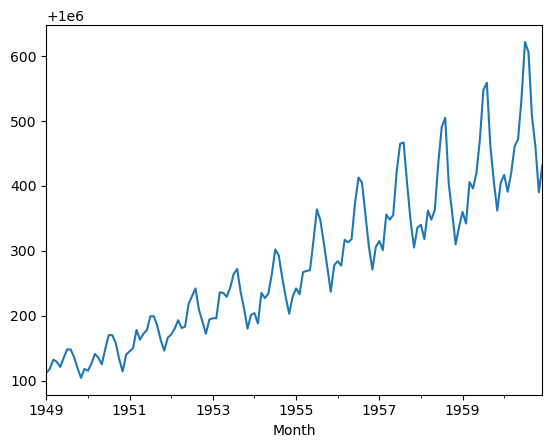

In [52]:
y.plot();

In [ ]:
#nice!!! so easy! and we can do this/perfect application cuz this IS timeseries!!!
#ALHAMDULILLAH HOW NICELY MAKING THE DATETIME AS THE INDEX WORKS W/ AUTOMATICALLY SETTING THE X-AXIS HOW WE WANT!!!

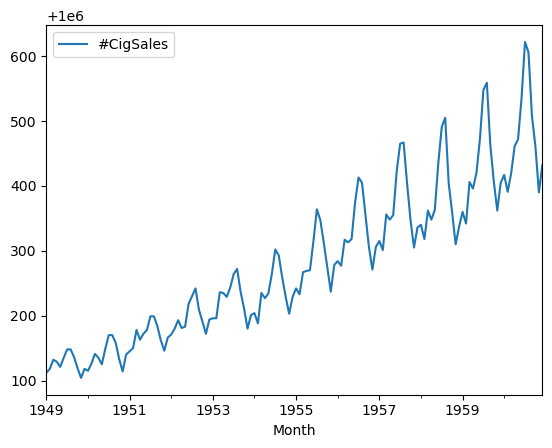

In [55]:
#so really since cigData is JUST this one column y anyway, it's basically the same as just plotting cigData isn't it?? or SHOULD be??
#but i get it - and i think this is what they were talking about - it's always better to keep a single column as a SERIES rather than a DATAFRAME!
#even though the indexing is the same. like maybe you NEED it to start out as a df so that you can format it & index it how you want THEN
#like convert it to a series from there!

cigData.plot();

In [ ]:
#YEP!!!!! ALHAMDULILLAH!!! EXACTLY THE SAME!!!!

In [ ]:
#BTW! you see the CYCLICAL nature!!! wouldn't have expected / thought of that! much more pronounced in latter years
#is it cuz cigarettes are SEASONAL or smth?!?!?!?!?!? like ppl do it more in the SUMMER cuz can be OUTDOORS MORE EASILY AND FOR LONGER!!!!
#never thought of that! so i wonder if ppl who are really into smoking prefer to live in like south cuz easier? at least for winter
#or that if smoking is MORE POPULAR PER CAPITA IN SOUTH, and if it is, if it's driven by weather, or maybe lack of education
############################################################

<AxesSubplot:xlabel='Month'>

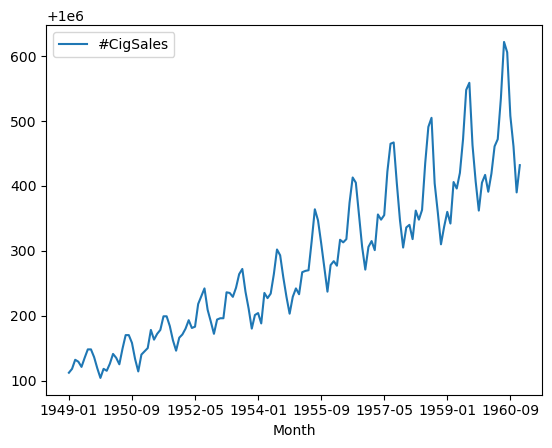

In [56]:
#let's see what woulda happened if we used the CUSTOM format!!

#so all we gotta do is take the original and simply DIRECTLY SET IT TO THE INDEX WITHOUT REFORMATTING EITHER BEFORE OR AFTER!

cigData_backup1_copy2 = cigData_backup1.copy()

cigData_backup1_copy2 = cigData_backup1_copy2.set_index('Month')
#btw, remem the nice thing w/ set_index is it 'shoves'/pushes the column you wanna make index INTO / as the index!
#you don't needa DELETE it/drop it after!!! 2-in-1!!!

cigData_backup1_copy2.plot();


In [ ]:
#AHHHH OKAY THERE YOU HAVE IT! so aH yeah our intuition and/about their guidance was right - you DO wanna have the official datetime format
#so that it'll optimize the plotter engine at least and i'm sure &more importantly the MODELING/PREDICTING ETC!
#so put up w/ the ugly table data lol no one looks at it anyway! that's under hood/behind the scenes! #indahood
#but again, may also be way to format it to liking while still following official datetime format
####################################################################################################

## 3. Modelling 
### 3a. Decomposition
What do you notice from the plot? Take at least `2` minutes to examine the plot, and write down everything you observe.  

All done?

We can see that, generally, there is a trend upwards in cigarette sales from at Cowboy Cigarettes. But there are also some striking - and perhaps unexpected - seasonal fluctuations. These seasonal fluctations come in a repeated pattern. Work out when these seasonal fluctuations are happening, and take 2 minutes to hypothesize on their cause here.

What does it mean to *decompose* time series data? It means breaking that data into 3 components: 

1. **Trend**: The overall direction that the data is travelling in (like upwards or downwards)
2. **Seasonality**: Cyclical patterns in the data 
3. **Noise**: The random variation in the data

We can treat these components differently, depending on the question and what's appropriate in the context. They can either be added together in an *additive* model, or multiplied together in a *multiplicative* model. 

Make a coffee, take `5` minutes and read [this article](https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7) and think about whether our data would conduce to an additive or multiplicative model here. Write your conclusion down just here: 

Based on the looks, clearly this is Multiplicative. The magnitude of the seasonality aka the amplitude of the swings is clearly going up in proportion to the overall sales.

In [59]:
#ejikkly!
#good idea, let's see/compare MONTHS to see when these seasonal flucts are! see if matches SUMMER theory!!

#ideas:
#can plot each point like a SCATT, and color coordinate by month? oh, but would have to add a column for month
#but prob ANY of these ideas would require adding a column for month
#MAN! WISH IT LET YOU *HOVER OVER*!!!

#OH! well, actually, if you look at my MAL-(wrong/bad)formatted plot, that includes the month, and so from a rough look there,
#you can see those humps seem to line up w/ -09 aka SEPTEMBER, and if you look more closely, that goes to just RIGHT of hump,
#so the HUMP *MUST BE JULY/AUGUST*!!!!!! PRIME SUMMERTIME!

#AND IF YOU LOOK CLOSELY, YOU'LL SEE THAT IT'S NOT JUST A *SINGLE* POINT HUMP, BUT THERE'S ACTUALLY USUALLY *TWO* PEAKS CLOSE TO EACH OTHER
#FOR CONSECUTIVE MONTHS, sometimes one higher, sometimes other, so basically, there's a BIG SHOT UP FROM JUNE TO JULY, THEN JULY & AUGUST ARE
#ABOUT THE SAME TYPICALLY, THEN SHOOTS WAY BACK DOWN IN SEPTEMBER!

#could check out like over time, how has the yearly pattern changed, like how much has the June-jump vs. September-drop been!/changed!

#and would be good if we had like WEEKLY sales, to see like gradual uptick / get better sense of June rise going into July, to see that
#more continuous transition, and same for August back down into September. like could be that BEGINNING september, like thru Labor Day,
#is same or even higher than August days, but then SEVERE drop after that, making it OVERALL seem very low; same w/ END OF JUNE!

#but for the fair weather theory, doesn't seem to line up then that June would be THAT low compared to july august!?

#and as far as the LOWS, that does seem to be the cold/winter season, as expected, but moreso the EARLY winter season/HOLIDAY season, which is
#understandable - family time, higher spirits, less work/stress, and maybe NEW YEARS RESOLUTIONS?! seems like NOVEMBER
#is lowest, Nov-January

#let's look at an example year
#the LAST year on file, since earlier years aren't as defined
cigData[-13:]
#cigData[:-13] >> aka putting number AFTER colon is the same as doing just [:13], aka FIRST 12! lol aka THE MINUS SIGN DOESN'T DO ANYTHING!
#but somehow also surprisingly doesn't interfere/error either!

,#CigSales
Month,
1959-12-01,1000405
1960-01-01,1000417
1960-02-01,1000391
1960-03-01,1000419
1960-04-01,1000461
1960-05-01,1000472
1960-06-01,1000535
1960-07-01,1000622
1960-08-01,1000606


<AxesSubplot:xlabel='Month'>

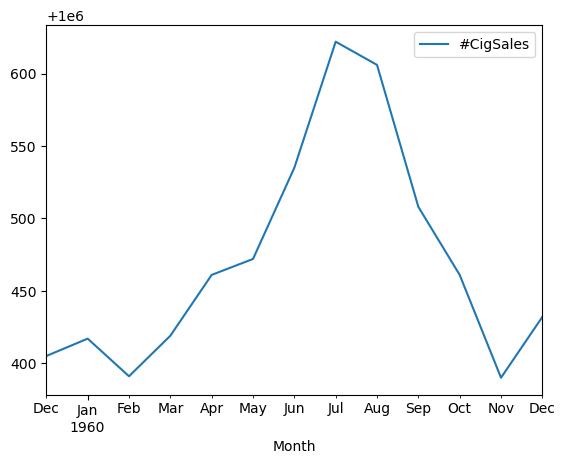

In [62]:
#yep, we see july august are highest! sA. could make this easier to view by plotting JUST THIS year, or by adding a column
#that subtracts 1Million lol like plot does automatically!

cigData[-13:].plot();

In [ ]:
#okay and lows in Nov&/thru/Feb!
#AND THEN ANOTHER IDEA IS YOU COULD PLOT *EACH YEAR* LIKE THIS *SUPERIMPOSED*!!!!
#and like color it w/ SHADING/intensity so that you could see if it's true that every year RISES,
#like overall, you see the hombre gradient looking natural, getting darker as you go up, meaning the
#LATER years, literal HIGHER numbers (ie 1960 > 1949, numerically!)!!!!!!
############################################################

In [ ]:
#OHHHHHHHHHHH! wait a minute - yeah totally forgot - this graph is misleading cuz makes it look like a BIG jump over this time frame,
#but really, THESE ARE ALL LIKE ALMOST *EXACTLY* THE SAME CONSIDERING THAT THE SCALE IS *OVER ONE MILLION*!!!!! if you look close, the y-axis
#basically CUTS OUT the 1MILLION and is JUST showing us the amount BEYOND that, which is on scale of hundreds!

#that's actually pretty crazy if you think about it - that it's that high, yet only fluctuates a few hundred over the years SO CONSISTENTLY!

#for this kinda cylical stuff - gotta compare like EACH MONTH'S PLOT OVER THE YEARS TO SEE IF ACTUALLY GOING UP YEAR-OVER-YEAR!!!!
############################################################

In [ ]:
#So don't know if the whole 'linear' vs. 'exponential/curve' things holds up cuz in the example they give us, the TRENDline is ~linear??
################################################################################################

In [65]:
cigData_backup1

,Month,#CigSales
0,1949-01,1000112
1,1949-02,1000118
2,1949-03,1000132
3,1949-04,1000129
4,1949-05,1000121
...,...,...
139,1960-08,1000606
140,1960-09,1000508
141,1960-10,1000461
142,1960-11,1000390


In [67]:
cigData_backup1_copy3 = cigData_backup1.copy()

#danggg, it's too late to work w/ the index now! now gotta go back n bring the old column back! or work w/ the older dataset that had it!
cigData_backup1_copy3['Month'] = pd.to_datetime(cigData_backup1_copy3['Month'])
cigData_backup1_copy3['year'] = cigData_backup1_copy3['Month'].dt.strftime('%Y')

cigData_backup1_copy3

,Month,#CigSales,year
0,1949-01-01,1000112,1949
1,1949-02-01,1000118,1949
2,1949-03-01,1000132,1949
3,1949-04-01,1000129,1949
4,1949-05-01,1000121,1949
...,...,...,...
139,1960-08-01,1000606,1960
140,1960-09-01,1000508,1960
141,1960-10-01,1000461,1960
142,1960-11-01,1000390,1960


In [73]:
cigData_backup1_copy3.year.unique()

array(['1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960'], dtype=object)

In [75]:
years

array(['1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '1959', '1960'], dtype=object)

In [79]:
for i in years:
    print(i)

1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960


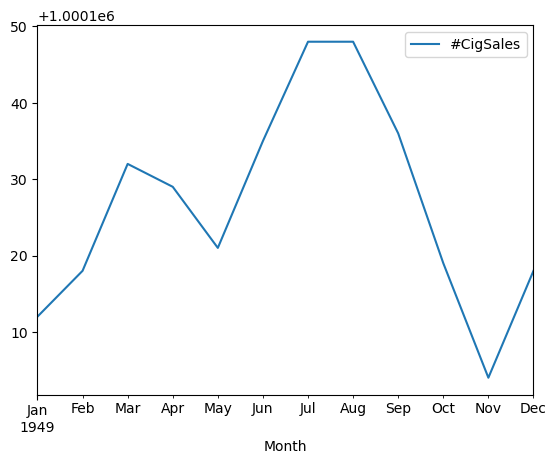

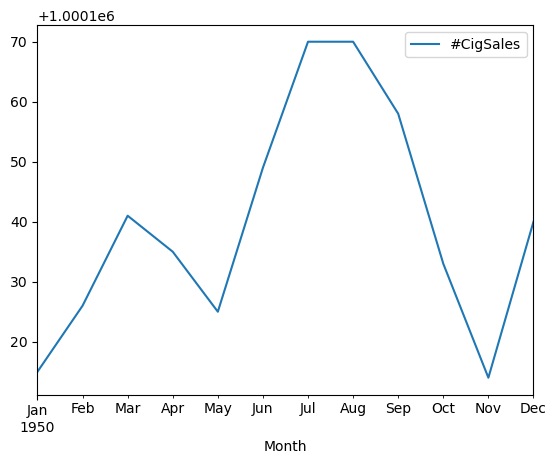

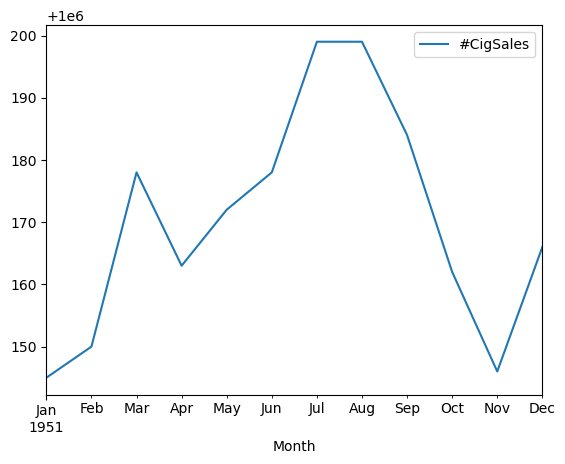

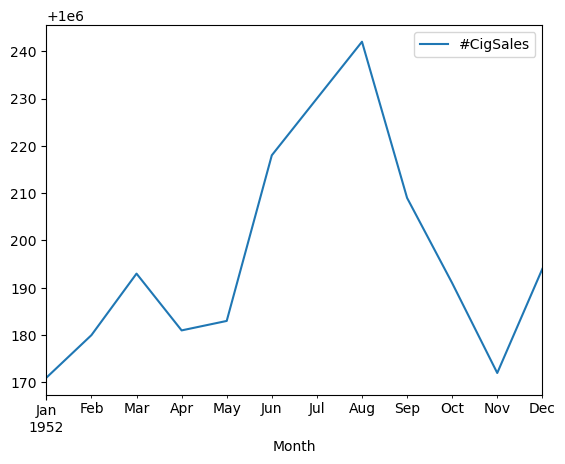

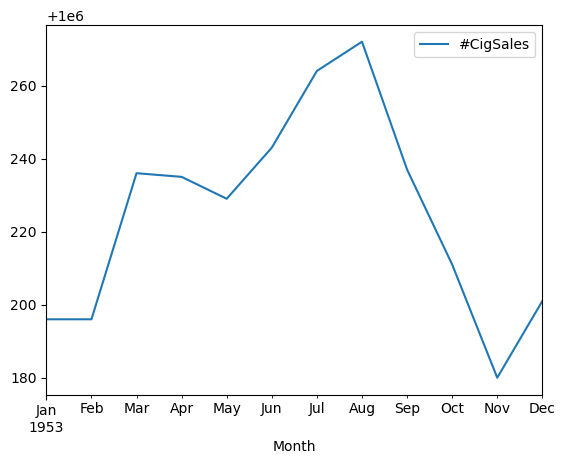

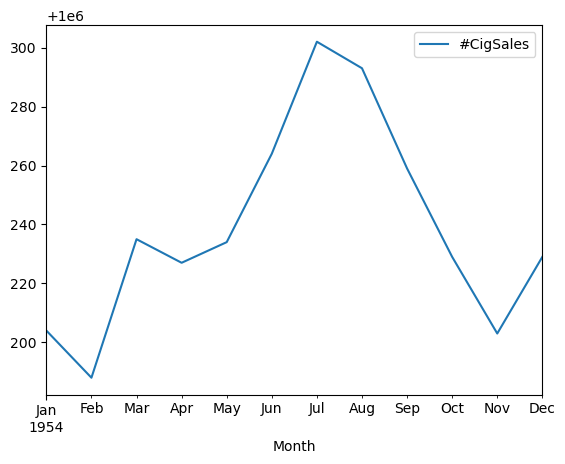

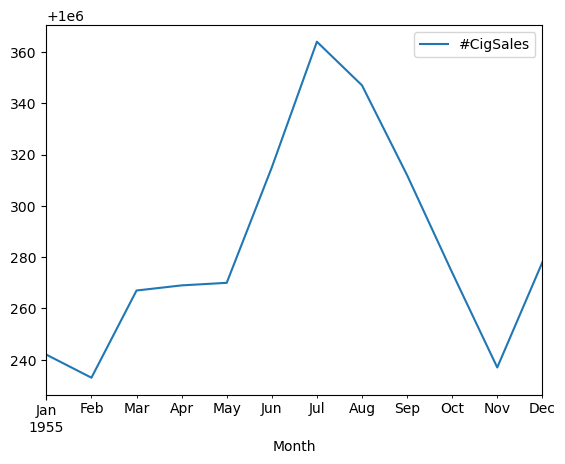

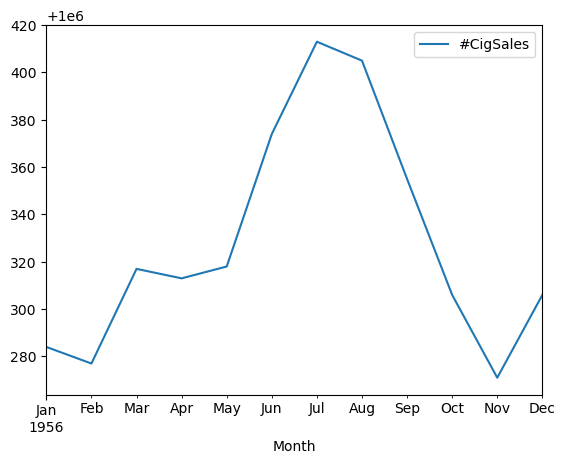

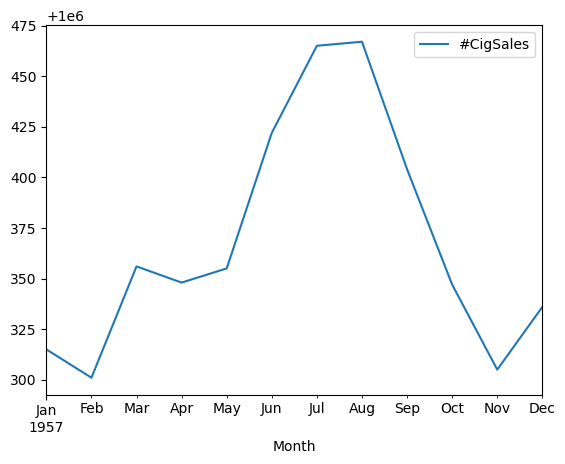

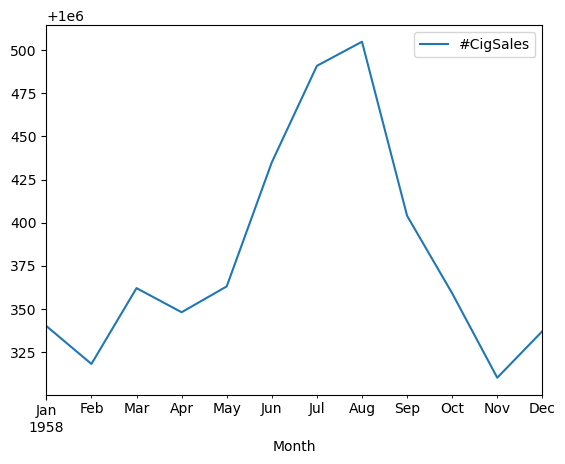

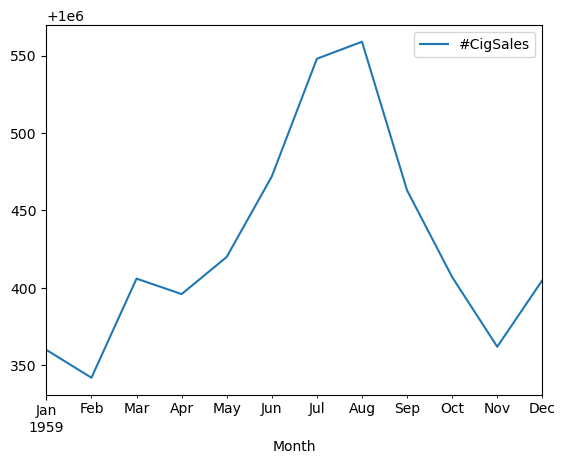

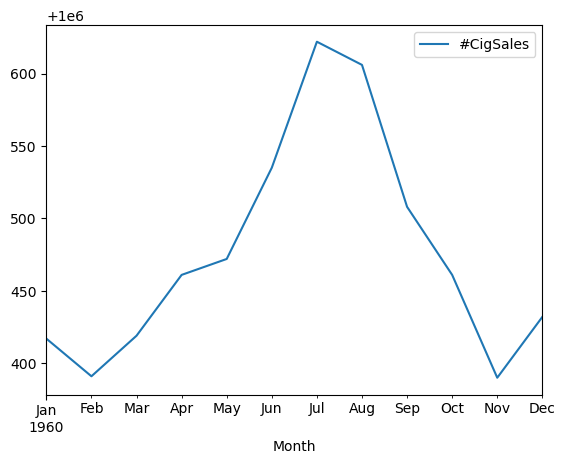

In [86]:
years = cigData_backup1_copy3.year.unique()

import matplotlib.pyplot as plt

for i in years:
    # cigData_backup1_copy3.query('year == "i"').plot(x='Month',y='#CigSales')
    cigData_backup1_copy3[cigData_backup1_copy3['year'] == i].plot(x='Month',y='#CigSales');
    # plt.show();

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


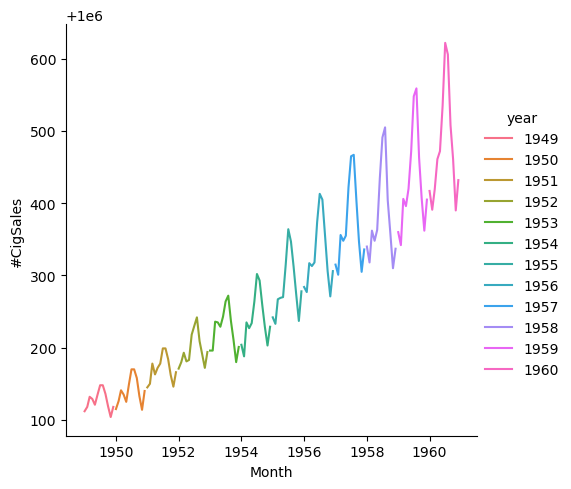

In [87]:
import seaborn as sns
sns.relplot(data=cigData_backup1_copy3, x='Month',y='#CigSales',hue='year',kind='line');


In [89]:
#ohhh, shoot lol, that's cuz 'Month' actually has the YEAR lol, so it's SEQUENTIAL
#so i need to add ANOTHER column for MONTH lol
cigData_backup1_copy3['month'] = cigData_backup1_copy3['Month'].dt.strftime('%m')


In [90]:
cigData_backup1_copy3

,Month,#CigSales,year,month
0,1949-01-01,1000112,1949,01
1,1949-02-01,1000118,1949,02
2,1949-03-01,1000132,1949,03
3,1949-04-01,1000129,1949,04
4,1949-05-01,1000121,1949,05
...,...,...,...,...
139,1960-08-01,1000606,1960,08
140,1960-09-01,1000508,1960,09
141,1960-10-01,1000461,1960,10
142,1960-11-01,1000390,1960,11


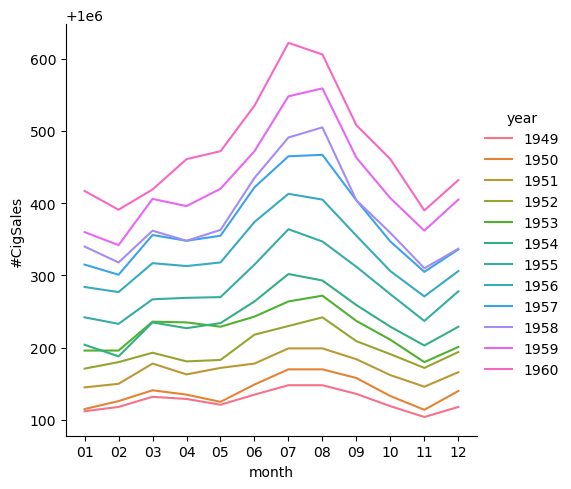

In [91]:
#now let's try
sns.relplot(data=cigData_backup1_copy3, x='month',y='#CigSales',hue='year',kind='line');


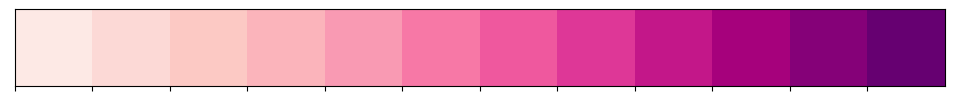

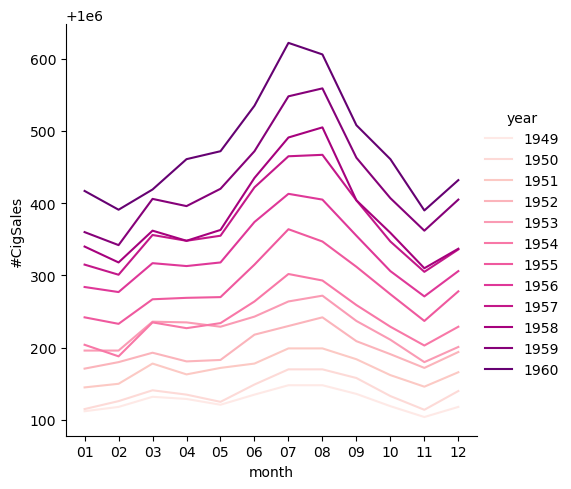

In [102]:
#ALHAMDULILLAH!!!! thing is, you can't actually be CERTAIN right off the bat that each one going up is THE NEXT YEAR,
#to prove our theory that it's going up each time, but YOU DO SEE THE GROWING AMPLITUDE / SEASONAL SWING EACH YEAR!!!
#we'd wanna do a INTENSITY palette, and then reverse order of legend!

# sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, as_cmap=True)
# sns.color_palette("Blues", as_cmap=True)
sequential_colors = sns.color_palette("RdPu", 12)
sns.palplot(sequential_colors)

sns.relplot(data=cigData_backup1_copy3, x='month',y='#CigSales',hue='year',kind='line',palette=sequential_colors);




In [110]:
years[::-1]

array(['1960', '1959', '1958', '1957', '1956', '1955', '1954', '1953',
       '1952', '1951', '1950', '1949'], dtype=object)

In [ ]:
#DROOOOOPE!!!!!
#ALHAMDULILLAH!!!!!
#######################################################

In [130]:
years_rev

array([1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950,
       1949])

TypeError: legend only accepts two non-keyword arguments

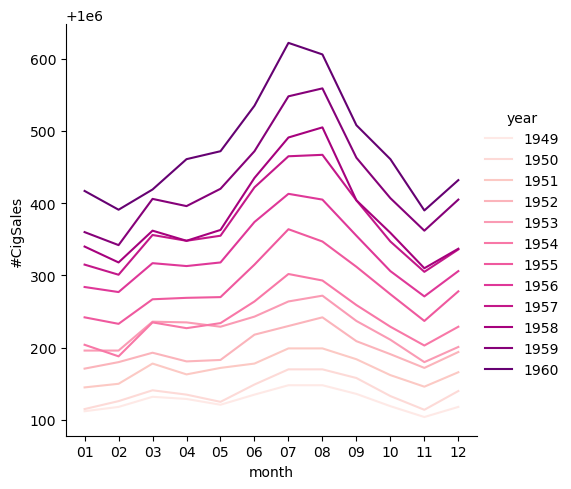

In [136]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!
#and now if we can just get the legend ordering fixed

sns.relplot(data=cigData_backup1_copy3, x='month',y='#CigSales',hue='year',kind='line',palette=sequential_colors);

plt.legend('1960', '1959', '1958', '1957', '1956', '1955', '1954', '1953', '1952', '1951', '1950', '1949')

# reordering the labels
# handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
# labels = ['1960', '1959', '1958', '1957', '1956', '1955', '1954', '1953', '1952', '1951', '1950', '1949'] #otherwise doesn't work as STRING, which is what it is! since i extracted datetime object!
# order = list(years_rev)

# pass handle & labels lists along with order as below
# plt.legend([handles[i] for i in order], [labels[i] for i in order])

#this handles, labels thing is supposed to work but maybe doesn't for me since datetime

In [ ]:
#mannnn. really hate when i can't get SIMPLE stuff!!!! like simply changing order of legend!
#could have something to do w/ how inherent year labels are STRING/text cuz tooken from datetime object, and i'm tryna tell it to do like NUMBERical,
#even tho i tried also doing as text/string...

In [131]:
labels

['1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960']

In [128]:
handles

In [129]:
order

[1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949]

In [112]:
[handles[i] for i in order]

TypeError: list indices must be integers or slices, not str

In [123]:
order

[1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949]

In [115]:
years[::-1].astype('int')

array([1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950,
       1949])

In [ ]:
years_rev = years[::-1].astype('int')

In [121]:
list(years_rev)

[1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949]

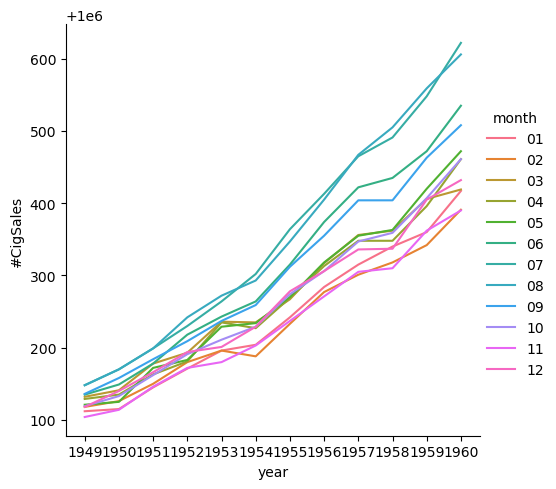

In [137]:
#now do the OTHER plot! EACH MONTH, over the years!
sns.relplot(data=cigData_backup1_copy3, x='year',y='#CigSales',hue='month',kind='line');


In [ ]:
#ALHAMDULILLAH!!!! that's hard to say, like it does seem relatively 'straight'ish/stick-ish, like a line, but could also see as getting SHARPER/
#STEEPER later on, but it could be that that's only for the SEASONAL SPIKES aka SUMMERTIME!!!
#*remem*, here, unlike last, it's not 'sequential'/chronological going up as in it's not like January bottom (01) and December (12) top!!!
#it's obv in order of whatever's highest!
#it's going up in value LEFT-TO-RIGHT cuz THAT'S over the years here! whereas in last, years were represented down to up!
#but it does seem that months' ranking was relatively consistent thru the years! maybe switched ONE place up or down! but nothing drastic!

All done? Well, just on the basis of the plot above, it seems our Cowboy Cigarettes data is actually multiplicative. 

That's because, as time progresses, the general trend seems to be increasing *at a rate that's also increasing*. We also see that the seasonal fluctuations (the peaks and troughs) get bigger and bigger as time progresses.

Now on the other hand, if the data were simply additive, we could expect the general trend to increase at a *steadily*, and a constant speed; and also for seasonal ups and downs not to increase or decrease in extent over time.

Happily, we can use the `decompose()` function to quantify the component parts described above in our data.

In [ ]:
#so the rate of increase is increasing?? is that a condition to be multiplicative? like exponential?

#hmm, okay, so additive will still be increasing IN GENERAL, but just GRADUALLY? like linearly?
#but this and also dude's example made it seem like GENERAL trend for MULTIPLICATIVE was also increasing LINEARLY...
#so difference is GRADUALLY or not?, but then how do you define/what's cutoff??
########################################################################################################################

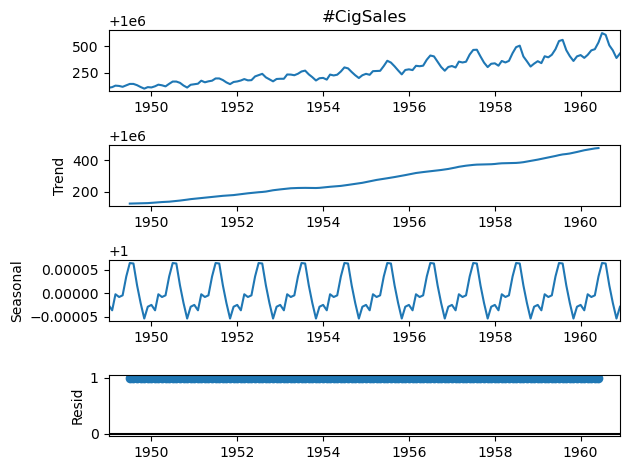

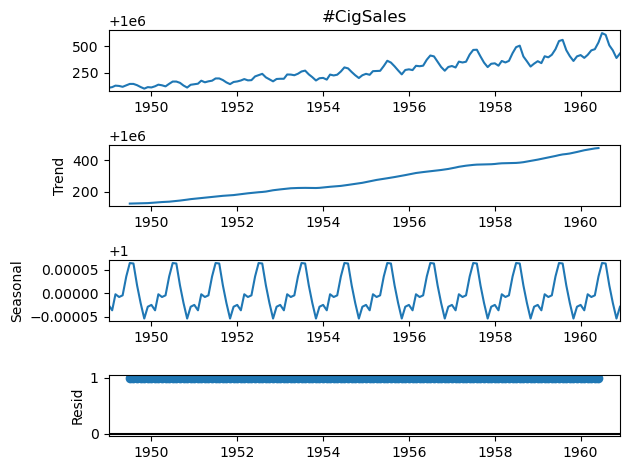

In [139]:
import statsmodels.api as sm

# Plot the original data, the trend, the seasonality, and the residuals 
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()

In [ ]:
#wow look how pronounced those SEASONALITY SWINGS BECOME!
#ahhh, okay - so that TREND line i guess is like the moving average? or basically the BEST FIT??
#but again - that's *LINEAR*??
#also, we could add the trendline to the timeseries! that'd be good
#WHOAAA WHY/HOW IS 'SEASONAL' LIKE *PERFECTLY* CONSISTENT AND *EXACTLY* THE SAME THROUGHOUT?!?
#AND WHY IS RESIDUAL PERFECTLY SITTING AT 1?? related to perfect seasonal??


### 3b. Testing for stationarity with KPSS
As you know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have constant mean, variance, and covariance.

There are many ways to test for stationarity, but one of the most common is the KPSS test. The Null hypothesis of this test is that the time series data in question is stationary; hence, if the *p*-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [ ]:
#WHATTHA HIGGY SIGGY?! we didn't even cover that in class!

In [142]:
#"A stationary time-series dataset will have constant mean, variance, and covariance" (aka/thus constant standard deviation too)
from statsmodels.tsa.stattools import kpss
#lol wow, they offer no instruction on how to use it

sm.tsa.stattools.kpss(cigData)#, regression='ct')

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.651312235417082,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
#oh dzead, think we can just simply do:
# kpss(cigData)
#or, ofc
kpss(y)#!

In [ ]:
#umm why we getting this warning?

In [144]:
sm.tsa.stattools.kpss(cigData, regression='ct')

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.09614984852336865,
 0.1,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [ ]:
#hmm okay wait so the pvalue changes depending on the REGRESSION arg used aka which of the two NULL hypotheses!
#'c' (default) is that the data is stationary around a CONSTANT
#'ct'          is that the data is stationary around a *TREND*!
#...BUT WHAT DOES THAT MEAN?!?!
#like i kinda thought it WOULD BE the latter, cuz like it's a constantTREND going up!
#whereas 'c' constant...value/mean i guess makes it seem like it's not doing anything, not changing over time...
# 
# so, if null is that it's stationary, that means that mean/other metrics AREN'T changing over time...
#oh... okay, so then yeah, i guess that WOULD BE 'c'!!!
#but then when would the null be 'ct', stationary around a constantTREND cuz then isn't it NOT STATIONARY if there's a constant trend in one direction??
#######################################################################################################################################

Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data. 

But our data need to be stationary! So we need to do some transforming.

In [ ]:
#yep! so as suspected, this data's def not stationary so we can REJECT the null hypo that it is!
#but we still gotta MAKE the data stationary!

### 3c. Making the data stationary 
Let's recall what it looks like. 

In [ ]:
#we do that by DOING FIRST DIFFERENCES RIGHT?!

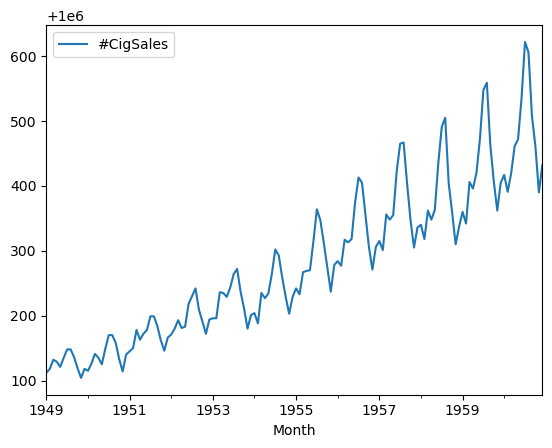

In [146]:
cigData.plot();

In our plot, we can see that both the mean and the variance *increase as time progresses*. At the moment, our data has neither a constant mean, nor a constant variance (the covariance, however, seems constant). 

One often used way of getting rid of changing variance is to take the natural log of all the values in our dataset. Let's do this now. 

In [ ]:
#"covariance seems constant" ... - how do you mean? like the fact of its CONSISTENCY in the seasonality? like which months are high & which are low?
################################################################################################

#TAKE NATURAL LOGS OF ALL THE VALUES?!?! DID WE EVER EVEN COVER THAT?!?
################################################################################################

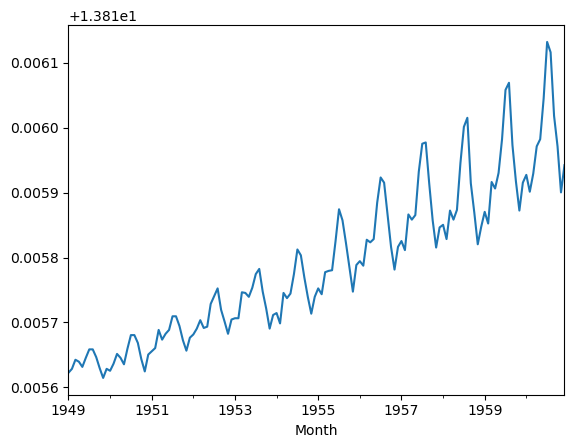

In [157]:
import math
# math.log(cigData['#CigSales']) #nope
import numpy as np
np.log(y).plot();

In [ ]:
#umm, that looks exactly the same... like proportions are same, just scaled the values down...
########################################################################################################################


When you plot this, you can see how the variance in our data now remains contant over time.

In [ ]:
#where are you seeing that? looks exactly same...

<AxesSubplot:xlabel='Month'>

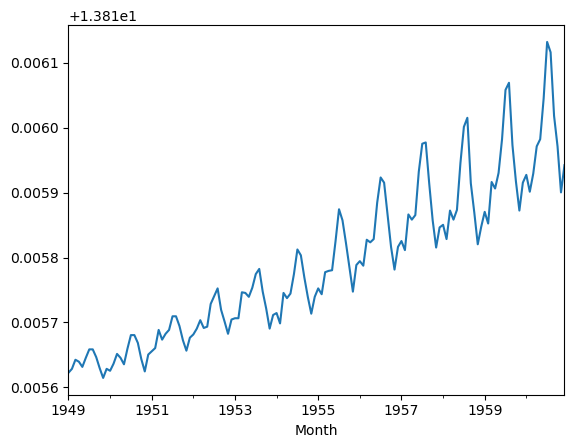

In [490]:
#lol just in case any funny business w/ like 'np.log(y).plot()'
y_log.plot();

We now have a constant variance, but we also need a constant mean.

We can do this by *differencing* our data. We difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Python is powerful, and we can use the `diff()` function to do this. You'll notice there's one less value than our existing dataset (since we're taking the difference between the existing values).

In [159]:
#okay this is what i was talking about / what we've seen

monthly_diffs = y.diff()
monthly_diffs

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #CigSales, Length: 144, dtype: float64

In [ ]:
#yep @ the one less! know that/offset/shift

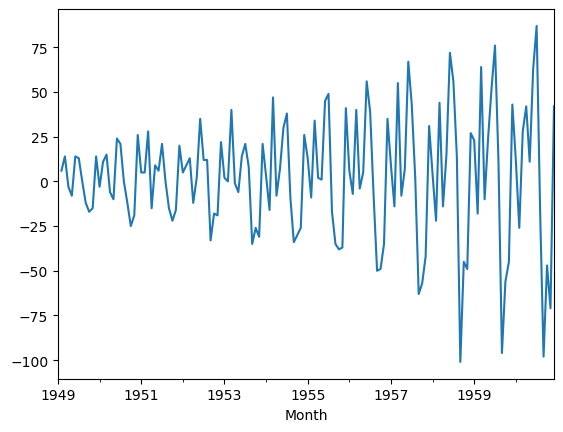

In [161]:
#ubb we never did the p-val, but guess you want us to..
#let's replot
monthly_diffs.plot();

In [162]:
#very nice!

#oh, just realized, i didn't do this w/ the LOGGED values! let's see if that makes diff

monthly_diffs_log = np.log(y).diff()
monthly_diffs_log

Month
1949-01-01         NaN
1949-02-01    0.000006
1949-03-01    0.000014
1949-04-01   -0.000003
1949-05-01   -0.000008
                ...   
1960-08-01   -0.000016
1960-09-01   -0.000098
1960-10-01   -0.000047
1960-11-01   -0.000071
1960-12-01    0.000042
Name: #CigSales, Length: 144, dtype: float64

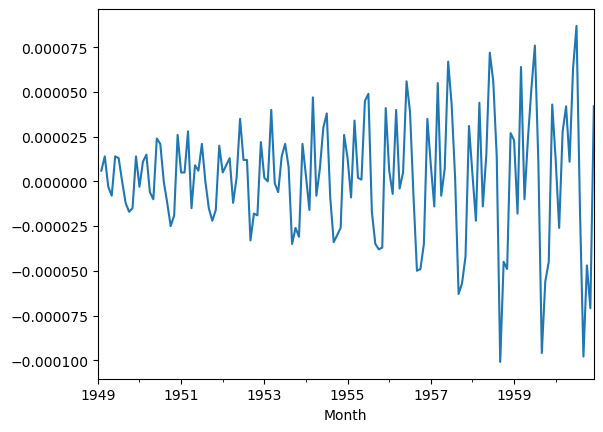

In [163]:
monthly_diffs_log.plot();

In [ ]:
#nope, again aH looks exactly the same
#so, confused about what log transforming did here?
#i know we've seen how it transforms other plots, like ones that are skewed
#but here these vals are so close to begin w/ maybe that's why?

In [164]:
#let's check pvals for both non-log & log

#original (like many things, can use either cigData or y - same thing)
sm.tsa.stattools.kpss(y)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.651312235417082,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [165]:
#non-logged diffs

sm.tsa.stattools.kpss(monthly_diffs)

ValueError: cannot convert float NaN to integer

In [167]:
#oh yeah lol gotta drop first!

#NON-logged diffs
sm.tsa.stattools.kpss(monthly_diffs.dropna())

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.023897614400183963,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [168]:
#logged diffs
sm.tsa.stattools.kpss(monthly_diffs_log.dropna())

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.023897674207570555,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
#yeah BASICALLY EXACTLY THE SAME!

#so yeah, now our p-val is > .05, meaning we'll say this *IS* indeed stationary, like we were hoping for!

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

### 3d. The ARIMA model

Recall that ARIMA models are based around the idea that it's possible to predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness in our data that can't ever be predicted.

We can find some good parameters for our model using the `sklearn` and `statsmodels` libraries, and in particular `mean_squared_error` and `ARIMA`. 

In [172]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima_model import ARIMA #>>THERE WAS AN ERROR/WARNING FROM THIS ONE, DEPRECATED SO IT SAID TO USE:
from statsmodels.tsa.arima.model import ARIMA


#### 3di. Make a function to find the MSE of a single ARIMA model
Things get intricate here. Don't worry if you can't do this yourself and need to drop down a Tier. 

In [176]:
#btw i'm not using logged, but shouldn't make diff right?

model = ARIMA(y, order=(1,0,1)) #how do we know what to set for the params? and are we doing AR or MA? or combined?
result = model.fit()
#THEN WE NEED THE DATETIMES/MONTHS FOR/FROM 1961-01 TO 1969-12 TO PREDICT!!!???
#oh, but then...WHERE IS THAT DATA to check against?!
#so... are we NOT actually tryna predict and see our score??
#are we just FITTING THE *TRAINING* aka BEST FIT/TREND LINE?!
#and, then do we NEED *DATETIMES* AS X'S OR NO?!
####################################################
y_pred = result.predict() #oh nice, so we actually don't need an 'X' independent/explanatory var to predict the y response/target for?
#cuz what would the X's be anyway? the DATES?
mean_squared_error(y,y_pred)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1301.6349094733566

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


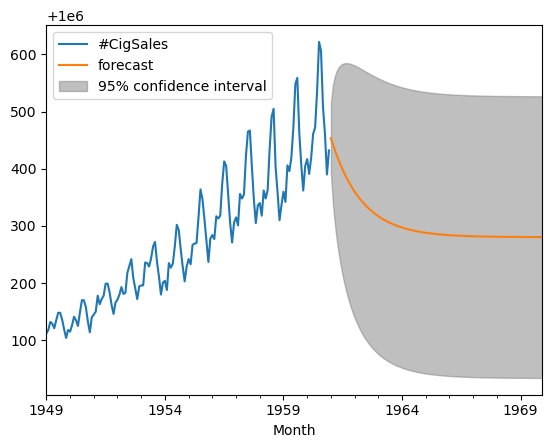

In [186]:
#ohh so maybe we gotta use PLOT_PREDICT?! even though didn't mention...

from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(y, order=(1,0,1))
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1961-01-01', end='1969-12-01', ax=ax) #predictions
plt.show()


In [ ]:
#ohhh shoot! actually worked!

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


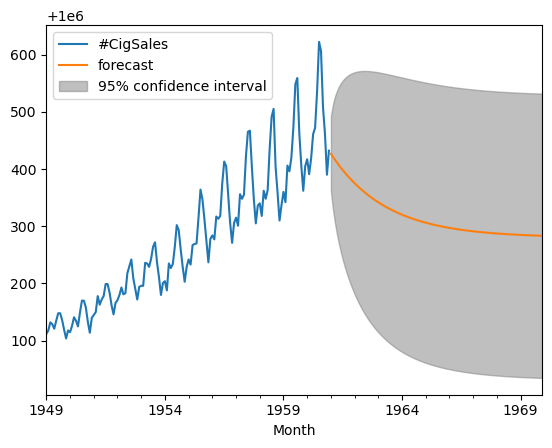

In [184]:
#ohhh wait! so since this is SEASONAL we'd wanna do gaps/LAGS of like *12* RIGHT?!
#OH WAIT! but that's not what's in *ORDER*, that's the number of lag TERMS!!!
#so how do we set the lag to what we want? we def did that in the beginning
#yeah like, if we looked at the autocorrelation, we'd find it high for EVERY 12 PERIODS!!!
####################################################################################

#so we won't look at that right now, and we'll be playing w/ tweaking the pdq params next i guess...like maybe w/ GRIDSEARCH!
model = ARIMA(y, order=(1,0,0))
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1961-01-01', end='1969-12-01', ax=ax, freq='M') #predictions
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?

In [ ]:
#don't know why still giving this error!
#set 'freq' to 'M' for month which got rid of some but not all??

#but also, doesn't make sense - like why would it go DOWN?!

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


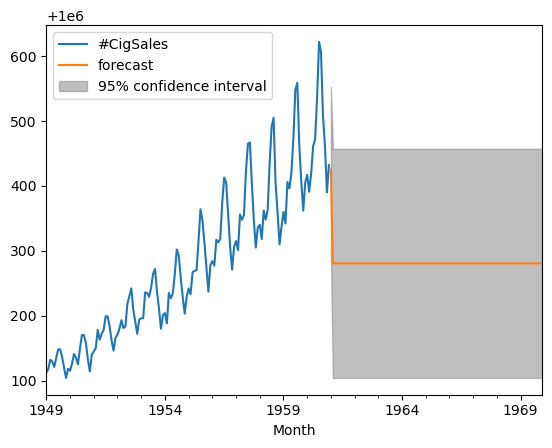

In [185]:
model = ARIMA(y, order=(0,0,1))
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1961-01-01', end='1969-12-01', ax=ax, freq='M') #predictions
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?

In [ ]:
#that's what we know it does! def don't want that!

In [ ]:
#ohhh, i think we gotta do what they did and start from the BEGINNING w/ the TRENDLINE/PREDICTIONS/FORECAST!

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


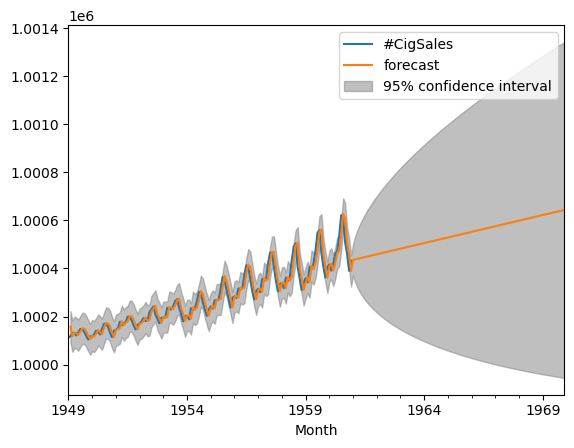

In [192]:
model = ARIMA(y, trend='t', order=(1,1,1)) #ohh, right! we ALREADY did first differences... why though and not 12th?! didn't even look at P/ACF!
#but they did say to do that. so i guess we'll just leave it to GRIDSEARCH to play around?! cuz nothing i'm trying is making sense
#in fact, thing that made MOST sense was using 12's!
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1949-02-01', end='1969-12-01', ax=ax)#, freq='M') #predictions
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/s

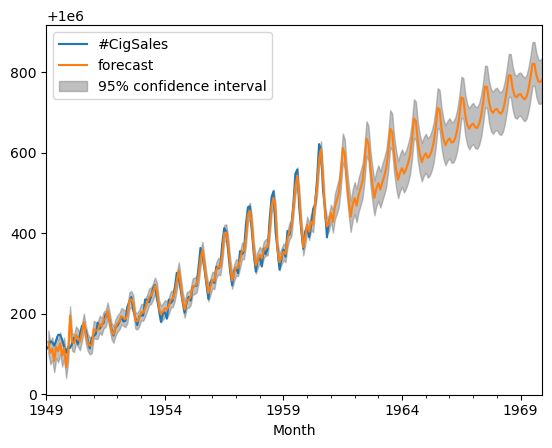

In [196]:
model = ARIMA(y, trend='t', order=(12,1,12))
#ok doesn't let me do d=12? hmmm, regardless of what other 2 nums are?
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1949-02-01', end='1969-12-01', ax=ax)#, freq='M') #predictions
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?

In [ ]:
#INTERESTING! if this is legit/makes sense, then the amplitude REGRESSES
#and pedals BACK! it's like it reverses its path and goes back to
#way it STARTED!

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


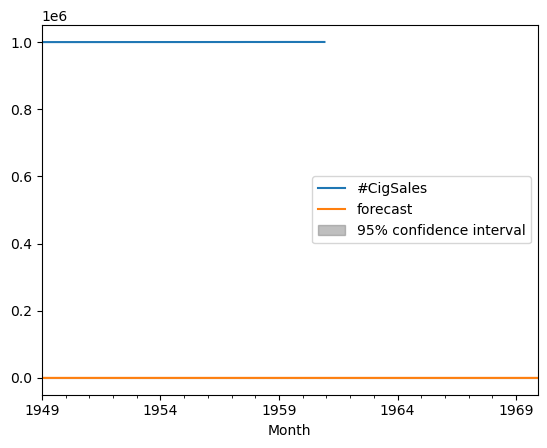

In [202]:
#OKAY FINALLY ONE THAT MAKES SENSE! not sure if understand pdq vals exactly but kinda? Lag12 means also ORDER(12)??

#BUT WHY ALL THESE WARNINGS/ERRORS?!

#non-invertible, non-stationary, max likelihood, no frequency, etc!

#btw we do trend='t' for straight line - don't know if have to? BUT STILL WASN'T STRAIGHT LINE?!
#################################################################################

#like are we supposed to use the DIFFS instead of the values themselves??

model = ARIMA(monthly_diffs, order=(1,0,1))
#tried log version too, same
result = model.fit()

fig, ax = plt.subplots()
y.plot(ax=ax) #actuals
plot_predict(result, start='1949-02-01', end='1969-12-01', ax=ax)#, freq='M') #predictions
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?


#OHHHHHH - this won't really show anything cuz the diffs are SUCH A *SMALL* NUM so VALUES WILL BE COMPLETELY DIFF SCALES
#TO BE ABLE TO PLOT ON SAME AXIS!!!! that's why these just look like flat lines! lol
#################################################################################

In [205]:
#but they want us to get MEAN SQUARED ERROR, yet we don't have any future TRUTH values to compare to...
#so... we really can ONLY do 'trendline' / best fit on 'training'??

#unless they wanted us to divide up/make our OWN train/test split?!

model = ARIMA(y, order=(1,0,1)) #dang 1,1,1 was HUGE lol!
# model = ARIMA(y, order=(p,d,q)) #model contains y monthly cigsales
result = model.fit() #learn the data
y_pred = result.predict() #give the best fit / 'predictions' for... the actuals i guess?, meaning actual DATES?!?
mean_squared_error(y,y_pred)

#so again, we're gonna play around w/ pdq w/ GridSearch
#but this is the same thing i guess that we just fed into the plotter?
#but yeah obvy we can only get an MSE for ACTUALS since we have both actuals & predicts to compare!

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1153.1928989862884

In [206]:
#let's check this:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              #CigSales   No. Observations:                  144
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -700.874
Date:                Tue, 10 Jan 2023   AIC                           1409.749
Time:                        16:09:50   BIC                           1421.628
Sample:                    01-01-1949   HQIC                          1414.576
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const           1e+06     56.644   1.77e+04      0.000       1e+06       1e+06
ar.L1          0.9373      0.028     34.009      0.000       0.883       0.991
ma.L1          0.4264      0.076      5.642      0.000       0.278       0.574
sigma2       968.4364    112.711      8.592      0.000     747.527    1189.346
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.84   Prob(JB):                         0.39
Heteroskedasticity (H):               6.81   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
#okay so there is the ar.L1 & ma.L1!
#oh so are these the same as the PARAMS, like;
result.params[0]

1000280.3009311323

In [209]:
#OHH so that's the CONSTANT, aka the thing BEFORE/RIGHT ABOVE these two - MAKES SENSE! cuz that's the first
#in the list, so YES, these must be the PARAMS!

#so now let's try:
result.params[1], result.params[2] 

(0.9373499820299843, 0.4263533098511299)

In [ ]:
#YEP YEP YEP!!!!! aH

#but so then are these like supposed to be similar to the ones WE
#specified?
#and there's no like 'goodness of fit' metric! like mse, r2 etc!

In [ ]:
#are we supposed to do parameter ESTIMATING?
#oh, but that refers to like phi & theta...
#so where do those come into play?!
#good question... don't really know....
#like phi/theta was something we tested the AUTOCORRELATION LAGS FOR! in AR/MA
#BUT I'M NOT SURE IF WE EVER DISCUSSED LIKE *HOW* TO PICK THE VALUE!
#and i'm confused cuz like when we do these... again, where does that come into play??
#or does that only come into play when you want to SIMULATE a series?! otherwise, if you already HAVE
#a series, you don't have to worry about it?!?!
######################################################################

#### 3dii. Make a function to evaluate the different ARIMA models with different p, d, and q values

In [216]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.

#okay so here we're basically gonna *CROSS-VAL*?!?!


# pred = result.get_prediction(start=pd.to_datetime('1961-01-01'), dynamic=False)
result.get_prediction(start='1961-01-01')#, dynamic=False)



In [ ]:
#oh shoot actually we prob needa start @ start, 1949

In [220]:
#let's store that
y_pred = result.get_prediction(start='1949-01-01').predicted_mean#, dynamic=False)
mean_squared_error(y,y_pred)


1153.1928989862884

In [221]:
#oh wow lol well sA, AT LEAST IT'S THE EXACT SAME RESULT!
y_pred = result.predict()
mean_squared_error(y,y_pred)

1153.1928989862884

In [228]:
#but yeah, back to cross-valing!

from sklearn.model_selection import GridSearchCV

params = {'p': range(13), 'd': range(13), 'q': range(13)} 

model = ARIMA(y)
# model = ARIMA(y, order=(p,d,q))
# model = ARIMA(y, order=('p','d','q'))


gscv = GridSearchCV(model,params)

gscv.fit(cigData.index, y)

# result = model.fit()
# y_pred = result.predict()
# mean_squared_error(y,y_pred)



/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


TypeError: Cannot clone object '<statsmodels.tsa.arima.model.ARIMA object at 0x18d0e9970>' (type <class 'statsmodels.tsa.arima.model.ARIMA'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [230]:
#hmmm, on second thought, maybe we just gotta do MANUAL for loop way??

ps = range(13)
ds = range(13)
qs = range(13)

for p in ps:
    for d in ds:
        for q in qs:
            model = ARIMA(y, order=(p,d,q))
            result = model.fit()
            y_pred = result.predict()
            mean_squared_error(y,y_pred)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency informa

KeyboardInterrupt: 

In [237]:
# Now, we choose a couple of values to try for each parameter.

#oh, lol okay it just says try a COUPLE, so let's LIMIT!

#hmmm, on second thought, maybe we just gotta do MANUAL for loop way??

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

results = pd.DataFrame({'p','d','q','mse'})

for p in ps:
    for d in ds:
        for q in qs:
            model = ARIMA(y, order=(p,d,q))
            p_list.append(p), d_list.append(d), q_list.append(q)
            result = model.fit()
            y_pred = result.predict()
            mse = mean_squared_error(y,y_pred)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency informa

,p,d,q,mse
0,2,0,2,1.115835e+03
1,2,0,1,1.128021e+03
2,1,0,2,1.147723e+03
3,1,0,1,1.153193e+03
4,2,0,0,1.179927e+03
5,1,0,0,1.301635e+03
6,0,0,2,2.275922e+03
7,0,0,1,4.382362e+03
8,0,0,0,1.429197e+04
9,2,1,2,6.946001e+09


In [ ]:
#SO WINNER IS 202!!! lol exton highway :P

In [232]:
# results = 
pd.DataFrame({'p':,'d':,'q':,'mse':})

SyntaxError: invalid syntax (3539256520.py, line 2)

In [233]:
p_list, d_list, q_list, mse_list = []

ValueError: not enough values to unpack (expected 4, got 0)

In [ ]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
#aH done

So the best p,d, q, parameters for our ARIMA model are 2, 1, 1 respectively. Now we know this, we can build the model.

In [ ]:
#WHATTHA...nooo......

In [ ]:
#okay, let's start over, seeing what they do

#oh interesting, so they actually DO train/test split

#that's another thing we haven't done here

###############but they didn't simply use TRAIN/TEST SPLIT CUZ THIS IS *TIME-SERIES* SO THE *ORDER*
#OF THE POINTS *MATTERS* AND THE WHOLE POINT IS WE'RE TRYNA PREDICT THE *FUTURE*!!!!
#so yeah, they made it really confusing, shoulda stuck to the initial story and had us predict on the missing thru 1970 dates,
#...but then i guess the whole thing is that, if they WERE missing, then obv *WE DON'T HAVE TRUTH VALUES*!
#so we'll work w/ what we have, splitting it up, then the MISSING 1970 DATA WILL ACT LIKE THE *FINAL *RESERVE*** SET EXCEPT WE WON'T
#BE ABLE TO *GRADE* IT BUT RATHER JUST TRUST THAT THIS MUST BE THE MOST *ACCURATE* ONE, BASED ON PERFORMANCE IN THE REST OF THE SET!!!!
#and in fact this way makes more sense as a reason for doing the 'hold out' set - WHEN YOU *DON'T* HAVE ANSWERS/TRUTH VALUES!!!!

#so yeah, that's why we're just gonna split *IN ORDER*!!!

split = int(.8*len(y))
train, test = y[:split], y[split:]
past = train
predictions = []

#so this is going thru each number 0 thru len(test), so say like 0 thru 20, if there were exactly 100 total points,
#and putting the predicted value for that date?
for i in range(len(test)):
    model = ARIMA(past, order=(p,d,q))
    results.fit()#THEY PUT 'disp=0'?!?!?!? #######################
    future = results.forecast() #>>WHAT'S DIFF BETWEEN FORECAST & PREDICT?!
    predictions.append(future)
    past.append(test[i]) #so we ALREADY have the list PAST for the past aka TRAINING cigsale values, so this is adding to it....test[i],
    #which is the test cigsales ACTUAL value currently being predicted
    #and remem, even though we're only calling TRAINING 'past', in reality ALL of this is PAST! cuz we ALREADY KNOW all of it! just splitting for (cross-)validation!
    #so basically this'll just end up being the same as original Y by the time it's done?!
    mse = mean_squared_error(test,predictions)

    #weird, why do we have to predict *ONE* at a time, and can't just do the WHOLE THING?!
    #don't think it's EVER BEEN LIKE THAT?!


In [267]:
train.values

array([1000112, 1000118, 1000132, 1000129, 1000121, 1000135, 1000148,
       1000148, 1000136, 1000119, 1000104, 1000118, 1000115, 1000126,
       1000141, 1000135, 1000125, 1000149, 1000170, 1000170, 1000158,
       1000133, 1000114, 1000140, 1000145, 1000150, 1000178, 1000163,
       1000172, 1000178, 1000199, 1000199, 1000184, 1000162, 1000146,
       1000166, 1000171, 1000180, 1000193, 1000181, 1000183, 1000218,
       1000230, 1000242, 1000209, 1000191, 1000172, 1000194, 1000196,
       1000196, 1000236, 1000235, 1000229, 1000243, 1000264, 1000272,
       1000237, 1000211, 1000180, 1000201, 1000204, 1000188, 1000235,
       1000227, 1000234, 1000264, 1000302, 1000293, 1000259, 1000229,
       1000203, 1000229, 1000242, 1000233, 1000267, 1000269, 1000270,
       1000315, 1000364, 1000347, 1000312, 1000274, 1000237, 1000278,
       1000284, 1000277, 1000317, 1000313, 1000318, 1000374, 1000413,
       1000405, 1000355, 1000306, 1000271, 1000306, 1000315, 1000301,
       1000356, 1000

In [270]:
y_test

array([1000505, 1000404, 1000359, 1000310, 1000337, 1000360, 1000342,
       1000406, 1000396, 1000420, 1000472, 1000548, 1000559, 1000463,
       1000407, 1000362, 1000405, 1000417, 1000391, 1000419, 1000461,
       1000472, 1000535, 1000622, 1000606, 1000508, 1000461, 1000390,
       1000432])

In [271]:
predictions

[1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000239.947827648,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,
 1000373.7870623866,


In [273]:
len(predictions)

58

In [276]:
result.forecast()[0]

1000373.7870623866

In [281]:
range(len(test))

range(0, 29)

In [283]:
test

Month
1958-08-01    1000505
1958-09-01    1000404
1958-10-01    1000359
1958-11-01    1000310
1958-12-01    1000337
1959-01-01    1000360
1959-02-01    1000342
1959-03-01    1000406
1959-04-01    1000396
1959-05-01    1000420
1959-06-01    1000472
1959-07-01    1000548
1959-08-01    1000559
1959-09-01    1000463
1959-10-01    1000407
1959-11-01    1000362
1959-12-01    1000405
1960-01-01    1000417
1960-02-01    1000391
1960-03-01    1000419
1960-04-01    1000461
1960-05-01    1000472
1960-06-01    1000535
1960-07-01    1000622
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, dtype: int64

In [282]:
test[1]

1000404

In [288]:
#aH!!! at least we chose the right range!

split = int(.8*len(y))
train, test = y[:split], y[split:]

past = train.values

y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(y_test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit()
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/d

,p,d,q,mse
0,0,0,2,6144.148184
1,1,0,0,8207.802532
2,0,1,0,8673.931034
3,1,1,2,8770.117800
4,2,1,1,8788.434119
5,1,0,2,8878.799031
6,2,1,0,8935.032039
7,0,1,1,8939.951784
8,0,1,2,8946.212245
9,1,1,1,8955.802026


In [ ]:
#well, that worked. had a ton of warnings...
#but not what they got...


In [289]:
predictions

[1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322,
 1000548.6996370322]

In [278]:
train

Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
               ...   
1958-03-01    1000362
1958-04-01    1000348
1958-05-01    1000363
1958-06-01    1000435
1958-07-01    1000491
Name: #CigSales, Length: 115, dtype: int64

In [279]:
[x for x in train]

[1000112,
 1000118,
 1000132,
 1000129,
 1000121,
 1000135,
 1000148,
 1000148,
 1000136,
 1000119,
 1000104,
 1000118,
 1000115,
 1000126,
 1000141,
 1000135,
 1000125,
 1000149,
 1000170,
 1000170,
 1000158,
 1000133,
 1000114,
 1000140,
 1000145,
 1000150,
 1000178,
 1000163,
 1000172,
 1000178,
 1000199,
 1000199,
 1000184,
 1000162,
 1000146,
 1000166,
 1000171,
 1000180,
 1000193,
 1000181,
 1000183,
 1000218,
 1000230,
 1000242,
 1000209,
 1000191,
 1000172,
 1000194,
 1000196,
 1000196,
 1000236,
 1000235,
 1000229,
 1000243,
 1000264,
 1000272,
 1000237,
 1000211,
 1000180,
 1000201,
 1000204,
 1000188,
 1000235,
 1000227,
 1000234,
 1000264,
 1000302,
 1000293,
 1000259,
 1000229,
 1000203,
 1000229,
 1000242,
 1000233,
 1000267,
 1000269,
 1000270,
 1000315,
 1000364,
 1000347,
 1000312,
 1000274,
 1000237,
 1000278,
 1000284,
 1000277,
 1000317,
 1000313,
 1000318,
 1000374,
 1000413,
 1000405,
 1000355,
 1000306,
 1000271,
 1000306,
 1000315,
 1000301,
 1000356,
 1000348,


In [248]:
y

1000432

In [244]:
result.forecast()

1958-08-01    1.000240e+06
Freq: MS, dtype: float64

In [240]:
test

Month
1958-08-01    1000505
1958-09-01    1000404
1958-10-01    1000359
1958-11-01    1000310
1958-12-01    1000337
1959-01-01    1000360
1959-02-01    1000342
1959-03-01    1000406
1959-04-01    1000396
1959-05-01    1000420
1959-06-01    1000472
1959-07-01    1000548
1959-08-01    1000559
1959-09-01    1000463
1959-10-01    1000407
1959-11-01    1000362
1959-12-01    1000405
1960-01-01    1000417
1960-02-01    1000391
1960-03-01    1000419
1960-04-01    1000461
1960-05-01    1000472
1960-06-01    1000535
1960-07-01    1000622
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, dtype: int64

In [241]:
y_pred

1949-01-01    1.000240e+06
1949-02-01    1.000240e+06
1949-03-01    1.000240e+06
1949-04-01    1.000240e+06
1949-05-01    1.000240e+06
                  ...     
1958-03-01    1.000240e+06
1958-04-01    1.000240e+06
1958-05-01    1.000240e+06
1958-06-01    1.000240e+06
1958-07-01    1.000240e+06
Freq: MS, Name: predicted_mean, Length: 115, dtype: float64

In [ ]:
#ohhhh. okay, i think i might understand - so you see how all these predictions are the same?
#so i think that's what it's talking about when they say like only based on the ONE single point before it,
#and i think that's what they're doing w/ the 'time-step-wise' one-ahead thing!
#so i think THAT'S WHY we have to predict ITERATIVELY one point at a time!!!! and that's prob why
#we gotta use *FORECAST* instead of *PREDICT*!!!!

In [290]:
split = int(.8*len(y))
train, test = y[:split], y[split:]

past = train.values

y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(y_test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit()
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(y_test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/deens/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/d

,p,d,q,mse
0,0,0,2,6144.148184
1,1,0,0,8207.802532
2,0,1,0,8673.931034
3,1,1,2,8770.117800
4,2,1,1,8788.434119
5,1,0,2,8878.799031
6,2,1,0,8935.032039
7,0,1,1,8939.951784
8,0,1,2,8946.212245
9,1,1,1,8955.802026


In [292]:
split = int(.8*len(y))
train, test = y[:split], y[split:]

past = train.values

y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(y_test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit(disp=0)
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(y_test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

TypeError: fit() got an unexpected keyword argument 'disp'

In [ ]:
#welp, (2,1,1) is ONE of the best atleast!

In [294]:
#hmm, let's try this! lol
import warnings
warnings.filterwarnings("ignore")
#and now let's try w/ LOGGED y's! in case any diff

y_log = np.log(y)

split = int(.8*len(y_log))
train, test = y_log[:split], y_log[split:]

past = train.values

y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(y_test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit()
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(y_test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [ ]:
#okay so same results seems w/ this, as expected

In [ ]:
#we're comparing ONE value of prediction cig sales for the final 29 months,
#for each p,d,q combo, and compare that to all of the ACTUAL values of those!

In [300]:
#is there maybe a way to get an ACTUAL set of predictions
split = int(.8*len(y))
train, test = y[:split], y[split:]

past = train.values

y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            model = ARIMA(past, order=(p,d,q)) #set up the model w/ the given p,d,q
            result = model.fit() #fit/train the model on the training cigSales numbers
            predictions = result.predict()
            mse = mean_squared_error(y_test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [299]:
result

In [ ]:
#so when we do .forecast, or .predict,... how does it know to predict just for the TEST values?
#it's really just doing like the AVG or whatever of the PREVIOUS/ALL PAST!

In [ ]:
#wait a minute, if all we wanted was the SAME value for the whole list, couldn't we have done it
#in a much easier way!!!

#but each p,d,q will get one MSE

In [301]:
#maybe let's try it w/ FULL table

#hmm, let's try this! lol
import warnings
warnings.filterwarnings("ignore")
#and now let's try w/ LOGGED y's! in case any diff

split = int(.8*len(y_log))
train, test = cigData[:split], cigData[split:]

past = train.values

# y_test = test.values

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit()
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,6144.148184
1,1,0,0,8207.802532
2,0,1,0,8673.931034
3,1,1,2,8770.117800
4,2,1,1,8788.434119
5,1,0,2,8878.799031
6,2,1,0,8935.032039
7,0,1,1,8939.951784
8,0,1,2,8946.212245
9,1,1,1,8955.802026


In [ ]:
#ughh, dangit, same exact thing

In [317]:
#okay, one last thing. try this w/ LOG of y

import warnings
warnings.filterwarnings("ignore")

split = int(.8*len(y_log))
train, test = y_log[:split], y_log[split:]

past = train.values

# y_test = test.values

#lol writing out this way didn't make difference either
ps = [0,1,2]
ds = [0,1,2]
qs = [0,1,2]

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            for t in range(len(test)):
                model = ARIMA(past, order=(p,d,q))
                result = model.fit()
                predictions.append(result.forecast()[0])#result.predict() #OHH, so need the [0] to just SINGLE OUT THE VALUE ITSELF AND NOT INCLUDE THE INDEX!
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [302]:
[x for x in range(3)]

[0, 1, 2]

In [303]:
range(3)

range(0, 3)

In [309]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(cigData) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = cigData[0:split], cigData[split:len(cigData)]
    past=[x for x in train] #meaning just train????
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit() #the heck is disp?? says doesn't exist?!
        future = model_fit.forecast()[0]
        # Append() here
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error



In [310]:
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [311]:
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

#lol wtheck?? could just do range(3)!!!!

In [312]:
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=38457.426
ARIMA(0, 0, 1) MSE=11888.782
ARIMA(0, 0, 2) MSE=5129.074
ARIMA(0, 1, 0) MSE=2755.345
ARIMA(0, 1, 1) MSE=2686.466
ARIMA(0, 1, 2) MSE=2696.135
ARIMA(0, 2, 0) MSE=3741.586
ARIMA(0, 2, 1) MSE=3723.891
ARIMA(0, 2, 2) MSE=3718.247
ARIMA(1, 0, 0) MSE=2759.625
ARIMA(1, 0, 1) MSE=2453.633
ARIMA(1, 0, 2) MSE=2664.769
ARIMA(1, 1, 0) MSE=2688.343
ARIMA(1, 1, 1) MSE=2690.971
ARIMA(1, 1, 2) MSE=2624.506
ARIMA(1, 2, 0) MSE=3724.713
ARIMA(1, 2, 1) MSE=3701.442
ARIMA(1, 2, 2) MSE=3706.197
ARIMA(2, 0, 0) MSE=2456.565
ARIMA(2, 0, 1) MSE=2488.981
ARIMA(2, 0, 2) MSE=2456.694
ARIMA(2, 1, 0) MSE=2694.286
ARIMA(2, 1, 1) MSE=2610.777
ARIMA(2, 1, 2) MSE=2299.415
ARIMA(2, 2, 0) MSE=3720.295
ARIMA(2, 2, 1) MSE=3706.631
ARIMA(2, 2, 2) MSE=3855.043
Best ARIMA(2, 1, 2) MSE=2299.415


In [ ]:
#SEE! i hadda take out the 'disp=0' aH THEN IT WORKED!
#okay so this displays ALL of them, the mse for EVERY pdq combo and its MSE!

#DANNNNNG! oh wait... so they said best is 2,1,1, but here it's 2,1,2??


In [ ]:
#OH BTW THO! you can see how it nicely goes *IN ORDER*! of looping thru the nested loops! p,d,q's

In [313]:
evaluate_models(y_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.000
ARIMA(0, 0, 1) MSE=0.000
ARIMA(0, 0, 2) MSE=0.000
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(2, 1, 1) MSE=0.000


In [ ]:
#OH WHATTHA HIGGY SIGGY! dangit lol so here it actually *DOES* make a diff?!? but annoying cuz doesn't even show
#you any MSE! could change that w/ the display decimal places

In [390]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train] #meaning just train????
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit() #the heck is disp?? says doesn't exist?!
        future = model_fit.forecast()[0]
        # Append() here
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error


# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [329]:
past

Month
1949-01-01    13.815623
1949-02-01    13.815629
1949-03-01    13.815643
1949-04-01    13.815640
1949-05-01    13.815632
                ...    
1958-03-01    13.815872
1958-04-01    13.815858
1958-05-01    13.815873
1958-06-01    13.815945
1958-07-01    13.816001
Name: #CigSales, Length: 115, dtype: float64

In [332]:
train

Month
1949-01-01    13.815623
1949-02-01    13.815629
1949-03-01    13.815643
1949-04-01    13.815640
1949-05-01    13.815632
                ...    
1958-03-01    13.815872
1958-04-01    13.815858
1958-05-01    13.815873
1958-06-01    13.815945
1958-07-01    13.816001
Name: #CigSales, Length: 115, dtype: float64

In [315]:
evaluate_models(y_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.000
ARIMA(0, 0, 1) MSE=0.000
ARIMA(0, 0, 2) MSE=0.000
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(2, 1, 1) MSE=0.000


In [ ]:
#writing em out one by one like this was one way to do it,
#kinda makes it exciting i guess lol, but or you could
#just do it MY way

In [321]:
#i wonder if it'll make a difference doing it like as just one value for whole list rather than
#doing ITERATION of it!?

#okay, one last thing. try this w/ LOG of y

import warnings
warnings.filterwarnings("ignore")

split = int(.8*len(y_log))
train, test = y_log[:split], y_log[split:]

past = train.values


#lol writing out this way didn't make difference either
ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            model = ARIMA(past, order=(p,d,q))
            result = model.fit()
            predictions = [result.forecast()[0] for i in range(len(test))]
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [ ]:
#dangit. so my way did work but gets SAME results!
#WHY / HOW ARE ALL THESE VALUES DIFFERENT?!?

In [322]:
#i wonder if it'll make a difference doing it like as just one value for whole list rather than
#doing ITERATION of it!?

#okay, one last thing. try this w/ LOG of y

import warnings
warnings.filterwarnings("ignore")

split = int(.8*len(y_log))
train, test = y_log[:split], y_log[split:]

past = train


#lol writing out this way didn't make difference either
ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            model = ARIMA(past, order=(p,d,q))
            result = model.fit()
            predictions = [result.forecast()[0] for i in range(len(test))]
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [323]:
#well, if it's not making diff anyway, might as well keep simplifiying!

#i wonder if it'll make a difference doing it like as just one value for whole list rather than
#doing ITERATION of it!?

#okay, one last thing. try this w/ LOG of y

import warnings
warnings.filterwarnings("ignore")

split = int(.8*len(y_log))
train, test = y_log[:split], y_log[split:]


#lol writing out this way didn't make difference either
ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = []
            model = ARIMA(train, order=(p,d,q))
            result = model.fit()
            predictions = [result.forecast()[0] for i in range(len(test))]
            mse = mean_squared_error(test,predictions)
            mse_list.append(mse)
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [333]:
train

Month
1949-01-01    13.815623
1949-02-01    13.815629
1949-03-01    13.815643
1949-04-01    13.815640
1949-05-01    13.815632
                ...    
1958-03-01    13.815872
1958-04-01    13.815858
1958-05-01    13.815873
1958-06-01    13.815945
1958-07-01    13.816001
Name: #CigSales, Length: 115, dtype: float64

In [335]:
#well, if it's not making diff anyway, might as well keep simplifiying!

import warnings
warnings.filterwarnings("ignore")

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]


ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            model = ARIMA(train, order=(p,d,q))
            result = model.fit()
            predictions = [result.forecast()[0] for i in range(len(test))]
            mse_list.append(mean_squared_error(test,predictions))
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [328]:
test

Month
1958-08-01    13.816015
1958-09-01    13.815914
1958-10-01    13.815869
1958-11-01    13.815821
1958-12-01    13.815848
1959-01-01    13.815870
1959-02-01    13.815852
1959-03-01    13.815916
1959-04-01    13.815906
1959-05-01    13.815930
1959-06-01    13.815982
1959-07-01    13.816058
1959-08-01    13.816069
1959-09-01    13.815973
1959-10-01    13.815917
1959-11-01    13.815872
1959-12-01    13.815915
1960-01-01    13.815927
1960-02-01    13.815901
1960-03-01    13.815929
1960-04-01    13.815971
1960-05-01    13.815982
1960-06-01    13.816045
1960-07-01    13.816132
1960-08-01    13.816116
1960-09-01    13.816018
1960-10-01    13.815971
1960-11-01    13.815900
1960-12-01    13.815942
Name: #CigSales, dtype: float64

In [327]:
predictions

[13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934,
 13.816042941340934]

In [324]:
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list})

,p,d,q,mse
0,0,0,0,4.815402e-08
1,0,0,1,4.818022e-08
2,0,0,2,7.977810e-09
3,0,1,0,8.666179e-09
4,0,1,1,9.970558e-09
5,0,1,2,8.889530e-09
6,0,2,0,1.747159e-08
7,0,2,1,1.735989e-08
8,0,2,2,1.502158e-08
9,1,0,0,8.177337e-09


In [325]:
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse')

,p,d,q,mse
2,0,0,2,7.977810e-09
9,1,0,0,8.177337e-09
3,0,1,0,8.666179e-09
14,1,1,2,8.672050e-09
11,1,0,2,8.704084e-09
22,2,1,1,8.760156e-09
21,2,1,0,8.796969e-09
23,2,1,2,8.828651e-09
5,0,1,2,8.889530e-09
19,2,0,1,8.890174e-09


In [338]:

warnings.filterwarnings("ignore")

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            model = ARIMA(train, order=(p,d,q))
            result = model.fit()
            predictions = [result.forecast()[0] for i in range(len(test))]
            mse_list.append(mean_squared_error(test,predictions))
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [ ]:
#man i really don't know why this is any different than their way!

In [382]:
#lemme try to combine ours/modify theirs to ours!


ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(data, ps, ds, qs):
    for p in ps:
        for d in ds:
            for q in qs:
                p_list.append(p), d_list.append(d), q_list.append(q)
                mse_list.append(evaluate_arima_model(data, p,d,q))
    return pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)


def evaluate_arima_model(data, p,d,q):
    split = int(len(data) * 0.8)
    train, test = data[:split], data[split:]
    model = ARIMA(past, order=(p,d,q))
    model_fit = model.fit()
    predictions = [model_fit.forecast()[0] for i in range(len(test))]
    mse = mean_squared_error(test, predictions)
    return mse


In [383]:
evaluate_models(y_log, ps, ds, qs)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [378]:
p_list, d_list, q_list, mse_list = [], [], [], []

# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(data, ps, ds, qs):
    for p in ps:
        for d in ds:
            for q in qs:
                p_list.append(p), d_list.append(d), q_list.append(q)
                split = int(len(data) * 0.8)
                train, test = data[:split], data[split:]
                model = ARIMA(past, order=(p,d,q))
                model_fit = model.fit()
                predictions = [model_fit.forecast()[0] for i in range(len(test))]
                mse_list.append(mean_squared_error(test, predictions))
    
    return pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)


In [379]:
evaluate_models(y_log, ps, ds, qs)

,p,d,q,mse
0,0,0,2,7.977810e-09
1,1,0,0,8.177337e-09
2,0,1,0,8.666179e-09
3,1,1,2,8.672050e-09
4,1,0,2,8.704084e-09
5,2,1,1,8.760156e-09
6,2,1,0,8.796969e-09
7,2,1,2,8.828651e-09
8,0,1,2,8.889530e-09
9,2,0,1,8.890174e-09


In [389]:
#can we manually try a calc w/ both and see how they compare??

#my way
split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]
model = ARIMA(train, order=(2,1,1))
result = model.fit()
predictions = [result.forecast()[0] for i in range(len(test))]
mean_squared_error(test,predictions)


8.760156331683372e-09

In [391]:
#okay, well, yes, at least that is what comes out in the ITERATION too

#so let's see what the heck THEY'RE getting!

evaluate_arima_model(y_log, (2,1,1))

2.2522549152361915e-09

In [ ]:
#dang! what the higgy siggy...
#let's double check w/ their raw

In [393]:
split= int(len(y_log) * 0.8) 
train, test = y_log[:split], y_log[split:]
past=[x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(past, order=(2,1,1))
    model_fit = model.fit()
    future = model_fit.forecast()[0]
    predictions.append(future)
    past.append(test[i])

mean_squared_error(test, predictions)

2.2522549152361915e-09

In [394]:
#let's keep trimming it down!

split= int(len(y_log) * 0.8) 
train, test = y_log[:split], y_log[split:]
# past=[x for x in train]
predictions = list()
for i in range(len(test)):
    model = ARIMA(train, order=(2,1,1))
    model_fit = model.fit()
    future = model_fit.forecast()[0]
    predictions.append(future)
    past.append(test[i])

mean_squared_error(test, predictions)

8.760156331683372e-09

In [397]:
#INTERESTING!!!! I DEF CHECKED FOR THIS!?!?!!?!?!?!?

[x for x in train]

[13.815622551692742,
 13.815628551002822,
 13.81564254925304,
 13.815639549644489,
 13.815631550644365,
 13.815645548852594,
 13.815658547013355,
 13.815658547013355,
 13.815646548717112,
 13.815629550884335,
 13.81561455255665,
 13.815628551002822,
 13.815625551352282,
 13.815636550026941,
 13.815651548024709,
 13.815645548852594,
 13.815635550152425,
 13.815659546864877,
 13.815680543515912,
 13.815680543515912,
 13.81566854548359,
 13.815643549120558,
 13.815624551466767,
 13.81565054816519,
 13.81565554745279,
 13.8156605467154,
 13.815688542124153,
 13.815673544681218,
 13.81568254317397,
 13.815688542124153,
 13.8157095381664,
 13.8157095381664,
 13.81569454103835,
 13.815672544843691,
 13.815656547307311,
 13.815676544187799,
 13.815681543345441,
 13.815690541766218,
 13.81570353934217,
 13.81569154158575,
 13.815693541221817,
 13.815728534205727,
 13.81574053151833,
 13.815752528686998,
 13.815719536126817,
 13.815701539726096,
 13.81568254317397,
 13.815704539148708,
 13.81570

In [398]:
train.values

array([13.81562255, 13.81562855, 13.81564255, 13.81563955, 13.81563155,
       13.81564555, 13.81565855, 13.81565855, 13.81564655, 13.81562955,
       13.81561455, 13.81562855, 13.81562555, 13.81563655, 13.81565155,
       13.81564555, 13.81563555, 13.81565955, 13.81568054, 13.81568054,
       13.81566855, 13.81564355, 13.81562455, 13.81565055, 13.81565555,
       13.81566055, 13.81568854, 13.81567354, 13.81568254, 13.81568854,
       13.81570954, 13.81570954, 13.81569454, 13.81567254, 13.81565655,
       13.81567654, 13.81568154, 13.81569054, 13.81570354, 13.81569154,
       13.81569354, 13.81572853, 13.81574053, 13.81575253, 13.81571954,
       13.81570154, 13.81568254, 13.81570454, 13.81570654, 13.81570654,
       13.81574653, 13.81574553, 13.81573953, 13.81575353, 13.81577452,
       13.81578252, 13.81574753, 13.81572154, 13.81569054, 13.81571154,
       13.81571454, 13.81569854, 13.81574553, 13.81573753, 13.81574453,
       13.81577452, 13.81581251, 13.81580352, 13.81576952, 13.81

In [ ]:
#wait... so the only difference is that one is a LIST and one is an array (with or without index - both work same),
#yet THE INTERPRETATION IS COMPLETELY DIFFERENT?!!? HOW ARE THE CALCULATIONS DIFFERENT IF THE *NUMBERS* ARE THE SAME?!?!

In [400]:
#wow we could just do THIS (below) instead of their x for x LC! ANWI! always doing things the complicated way!
list(train)

[13.815622551692742,
 13.815628551002822,
 13.81564254925304,
 13.815639549644489,
 13.815631550644365,
 13.815645548852594,
 13.815658547013355,
 13.815658547013355,
 13.815646548717112,
 13.815629550884335,
 13.81561455255665,
 13.815628551002822,
 13.815625551352282,
 13.815636550026941,
 13.815651548024709,
 13.815645548852594,
 13.815635550152425,
 13.815659546864877,
 13.815680543515912,
 13.815680543515912,
 13.81566854548359,
 13.815643549120558,
 13.815624551466767,
 13.81565054816519,
 13.81565554745279,
 13.8156605467154,
 13.815688542124153,
 13.815673544681218,
 13.81568254317397,
 13.815688542124153,
 13.8157095381664,
 13.8157095381664,
 13.81569454103835,
 13.815672544843691,
 13.815656547307311,
 13.815676544187799,
 13.815681543345441,
 13.815690541766218,
 13.81570353934217,
 13.81569154158575,
 13.815693541221817,
 13.815728534205727,
 13.81574053151833,
 13.815752528686998,
 13.815719536126817,
 13.815701539726096,
 13.81568254317397,
 13.815704539148708,
 13.81570

In [402]:
split= int(len(y_log) * 0.8)
train, test = y_log[:split], y_log[split:]
train = list(train)
predictions = list()
for i in range(len(test)):
    model = ARIMA(past, order=(2,1,1))
    model_fit = model.fit()
    future = model_fit.forecast()[0]
    predictions.append(future)
    past.append(test[i])

mean_squared_error(test, predictions)

2.4750518189732773e-09

In [403]:
#okay aH so far so good! working w/ our tweaks

split= int(len(y_log) * 0.8)
train, test = y_log[:split], y_log[split:]
train = list(train)
predictions = []
for i in range(len(test)):
    model = ARIMA(past, order=(2,1,1))
    model_fit = model.fit()
    future = model_fit.forecast()[0]
    predictions.append(future)

mean_squared_error(test, predictions)

6.90138921197625e-09

In [ ]:
#ohhhhhhhhhhhhhhhhhh shoot!
#WOW SOMEHOW DIDN'T PICK UP ON THIS BEFORE, BUT THE
#PAST LIST ACTUALLY *DOES* HAVE A ROLE, NOW THAT I SIMPLIFIED THINGS
#GREATLY, CAN SEE IT!!!!
#SO WE ACTUALLY *NEED* THE PAST LIST AKA AS ITS OWN ACTUAL *LIST*
#AND THEN ACCOMPANYING THAT WE NEED THE *APPENDAGE* TO IT THAT'S WITHIN
#THE FOR LOOP BODY BECAUSE THAT'S *UPDATING* THE "PAST" EACH TIME!!!!!
#so it's not just that we need the values in LIST form, --> there's a REASON!
#the real reason is cuz we needa APPEND that list!!!

In [409]:
#so let's see what we could do

split= int(len(y_log) * 0.8)
train, test = y_log[:split], y_log[split:]
past = list(train)
predictions = []
for i in range(len(test)):
    model = ARIMA(past, order=(2,1,1))
    model_fit = model.fit()
    future = model_fit.forecast()[0]
    predictions.append(future)
    past.append(test[i])
mean_squared_error(test, predictions)

2.2522549152361915e-09

In [ ]:
#ALHAMDULILLAH!

In [415]:
############################################################
#############THIS BE THE ONE!!!########################
############################################################

#sA so if we go back to my way, ALL WE GOTTA DO IS THAT?!

warnings.filterwarnings("ignore")

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]
#have one train/test split to try out for ALL model versions (diff order pdq params)
#where it trains step-wise one point at a time for the NEXT point to predict just the next one-step ahead
#point at a time, then brings in another one, from TEST. like basically, once it PREDICTED/attempted to PREDICT
#a test point, then it can bring the ACTUAL test point, like the right answer/truth, in as now a TRAINING point, 'past',
#cuz now it's BEHIND US! this way, step-wise, avoid any cross-contamination/leakage/leekage/peekage!

ps = range(3)
ds = range(3)
qs = range(3)

p_list, d_list, q_list, mse_list = [], [], [], []

#so for every p,d,q combo, predict the test points, and get an mse score of predictions vs. actuals

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            predictions = [] #to hold/store the predicted test points
            past = list(train) #starting point for step-wise predictions, one point at a time ###GOTTA HAVE THIS HERE CUZ FOR *EACH* NEW P,D,Q, IT'S GOTTA *RESTART* AT BEING *JUST* THE ORIGINAL TRAINING DATA!!!!!!!! originally mistakenly had it outside loop/above so never reset! was just adding to it!
            for i in range(len(test)):#step-wise predicts each, next/one-step-ahead point based on all the others BEFORE it!
                model = ARIMA(past, order=(p,d,q))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
                result = model.fit()#train/fit model on given training data
                next_point_prediction = result.forecast() #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!
                predictions.append(next_point_prediction)
                past.append(test[i])#very important to include this because this sets up the NEXT guy w/ one more additional point for its predict; lol it's the right answer for what we were just tryna predict!
            mse_list.append(mean_squared_error(test,predictions))
            
            
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)

,p,d,q,mse
0,2,1,1,2.252255e-09
1,2,1,2,2.327174e-09
2,1,1,2,2.330926e-09
3,1,0,1,2.426904e-09
4,2,1,0,2.436357e-09
5,0,1,1,2.450174e-09
6,1,1,1,2.452412e-09
7,2,0,1,2.454363e-09
8,2,0,0,2.454991e-09
9,1,1,0,2.493645e-09


In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!!
############################################################
############################################################
############################################################

In [413]:
#THIS IS HOW I FIGURED OUT IT WAS SOMETHING WITH THE *LOOP* ARCHITECTURE OF ITERATING THRU OTHER P,D,Q's AND NOT MY *INNER* LOOP
#FOR CALCULATING A *SINGLE* P,D,Q MSE THAT WAS THE ISSUE!!!!! cuz the single portion, here, works fine/gives right/matching answer!!!!
#so this worked cuz past = list(train) is above outside the innermost loop, but above problem was it was outside ALL loops altogether! global!
#when should been inbetween last 2 loops/levels so that it reset for each pdq!!!!!!

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

past = list(train) #starting point for step-wise predictions, one point at a time

ps = range(3)
ds = range(3)
qs = range(3)
predictions, mse_list = [], []
for i in range(len(test)): #step-wise predicts each, next/one-step-ahead point based on all the others BEFORE it!
    model = ARIMA(past, order=(2,1,1)) #set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
    result = model.fit() #train/fit model on given training data
    next_point_prediction = result.forecast()[0]
    predictions.append(next_point_prediction)
    past.append(test[i]) #very important to include this because this sets up the NEXT guy w/ one more additional point for its predict; lol it's the right answer for what we were just tryna predict!
mse_list.append(mean_squared_error(test,predictions))
mse_list #obvy coulda done without a list and just did mse() function but wanted to mimic/match/reproduce as closely as possible lol

[2.2522549152361915e-09]

In [ ]:
#remem we're ONLY giving it past points to predict FUTURE points like ONLY *ONE* DIMENSION!!!
#like there's no X explanatories here!!! *JUST* y's!!!! no other factors!

In [ ]:
#ahhh, okay, yeah, so this way, like their way, takes much longer because each of the 27 combinations (HENCE WHY WE SEE ROWS 0->26!!!!)
#of pdq orders iterations has to go thru 29 iterations to PREDICT ALL THE POINTS!!!

So the best p,d, q, parameters for our ARIMA model are 2, 1, 1 respectively. Now we know this, we can build the model.

In [417]:
#so i guess meaning like now just HARD code the placeholders we used in iteration!
#oh! that means like JUST basically the iso piece like i just did above!!!!

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

predictions = [] #to hold/store the predicted test points
past = list(train) #starting point for step-wise predictions, one point at a time ###GOTTA HAVE THIS HERE CUZ FOR *EACH* NEW P,D,Q, IT'S GOTTA *RESTART* AT BEING *JUST* THE ORIGINAL TRAINING DATA!!!!!!!! originally mistakenly had it outside loop/above so never reset! was just adding to it!

for i in range(len(test)):#step-wise predicts each, next/one-step-ahead point based on all the others BEFORE it!
    model = ARIMA(past, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
    result = model.fit()#train/fit model on given training data
    next_point_prediction = result.forecast()[0]
    predictions.append(next_point_prediction)
    past.append(test[i])#very important to include this because this sets up the NEXT guy w/ one more additional point for its predict; lol it's the right answer for what we were just tryna predict!
mean_squared_error(test,predictions)

2.2522549152361915e-09

In [424]:
#oh, i think they want it EVEN SIMPLER THAN THIS!

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

past = list(train) #starting point for step-wise predictions, one point at a time ###GOTTA HAVE THIS HERE CUZ FOR *EACH* NEW P,D,Q, IT'S GOTTA *RESTART* AT BEING *JUST* THE ORIGINAL TRAINING DATA!!!!!!!! originally mistakenly had it outside loop/above so never reset! was just adding to it!


model = ARIMA(past, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
result = model.fit()#train/fit model on given training data
forecast = result.forecast(29)

forecast

array([13.81600236, 13.81598838, 13.8159819 , 13.81598243, 13.81598426,
       13.81598494, 13.8159848 , 13.81598457, 13.8159845 , 13.81598453,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456])

In [ ]:
#why'd they only go out 24 points? we had *29*?

#oh NOTE! the last like MAJORITY of forecasted points are EXACTLY THE SAME!!!

#we could've also trained on the full set instead of only train

In [419]:
#oh... wait, is this just like .PREDICT() than??
model = ARIMA(past, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
result = model.fit()#train/fit model on given training data
result.predict()

array([ 0.        , 13.81562255, 13.81563038, 13.81564573, 13.81563582,
       13.81562937, 13.81565155, 13.81565964, 13.81565539, 13.81564246,
       13.81562688, 13.815614  , 13.81563664, 13.81562209, 13.81564035,
       13.81565371, 13.81564015, 13.81563335, 13.81566909, 13.81568195,
       13.81567539, 13.81566418, 13.81563837, 13.81562452, 13.81566338,
       13.81565206, 13.81566049, 13.8156957 , 13.81566262, 13.81568781,
       13.81568856, 13.81571446, 13.81570471, 13.81568937, 13.81566896,
       13.81565685, 13.81568683, 13.81567927, 13.81569183, 13.81570528,
       13.81568473, 13.81569637, 13.81573896, 13.81573652, 13.81575265,
       13.81570626, 13.81570285, 13.81568143, 13.81571611, 13.81570299,
       13.81570572, 13.81575855, 13.8157364 , 13.81573688, 13.81575884,
       13.81577795, 13.81578002, 13.81573446, 13.81572091, 13.8156876 ,
       13.81572567, 13.81571188, 13.81569275, 13.8157632 , 13.81572514,
       13.81574733, 13.81578201, 13.81581732, 13.81579159, 13.81

In [420]:
#OHHHHHHH! so .predict() on model.fit() will make a BEST FIT OF *TRAINING*!!!! 'retroactive' forecast lol!! *BEFORE*cast!!!!!! ;P
#vs. forecast will only cast *AHEAD*!!!! but will go AS MANY POINTS OUT AS YOU WANT!!!!
#default is only *1*, which is what we used since we wanted to only do one-ahead! the right way!
##################################################################################################################################

115

In [422]:
model = ARIMA(past, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
result = model.fit()#train/fit model on given training data
result.forecast()

13.816002356495192

We can take a look at a summary of the model this library has built around our data.

In [425]:
model = ARIMA(past, order=(2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1045.188
Date:                Wed, 11 Jan 2023   AIC                          -2082.375
Time:                        11:18:42   BIC                          -2071.430
Sample:                             0   HQIC                         -2077.933
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4471    1.4e-19    3.2e+18      0.000       0.447       0.447
ar.L2         -0.2451   1.42e-19  -1.72e+18      0.000      -0.245      -0.245
ma.L1         -0.1065   2.04e-19  -5.21e+17      0.000      -0.107      -0.107
sigma2      6.566e-10   2.89e-10      2.271      0.023    8.99e-11    1.22e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.88   Prob(JB):                         0.15
Heteroskedasticity (H):               6.26   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
#okay so what do we get out of this...
#well, i guess since we went up to order 2 for AR, THAT'S WHY WE SEE THE L1/L2 PARAMS!!!

######OHHHHHHHHHHH!!!!!!!! AND THE 'COEFFS' OF THEM ARE THE PARAM VALUES FOR THE EQUATION FOR TWO PHI'S & THETA!!!!!!!
#cuz since AR(2),MA(1) aka ARMA(2,1)
#SO THIS ANSWERS WHEN WE WERE WONDERING ABOUT WHAT THE PARAM VALUES ARE!!!
#lags again tho is different - that's something we see in autocorrelation, and again like we'd expect to see
#high AC here w/ multiples of 12! cuz of seasonality!
#but i think the L1 & L2 terminology here for the ar/ma params DO refer to LAG1/LAG2, but obvy not the AUTOCORRELATION,
#but rather the LAG1/2 ***COEFFICIENTS/HYPER/PARAMS*** IN THE EQUATION!!!! PHIS/THETAS!!!!!!
###################################################################################################################

#oh yeah, .summary() is titled 'SARIMAX' results! lol cuz a sari is like a MAXI lol

In [ ]:
#BUT HOW COME WE NEVER DID LIKE LAG12 (well, look at MULTIPLES of 12!!!) SEASONALITY AUTOCORRELATION?!?!?!?!!?
###################################################################################################################

### 3e. Visualize the results 

Visualize the original dataset plotted against our model. 

In [ ]:
#############################################################################
#they only made lump forecast intending to / for FUTURE predictions, but yeah, that's what we use LUMP for!
#but lump is just STRAIGHT like avg/single value basically while plot_predict gives us a MOVING AVG continuation/'best fit line'!!!!

In [426]:
#so do what i did earlier but like the manual two in one, actual vs. forecast?

#but wait.... if they're okay w/ just doing a LUMP forecast rather than one-at-a-time, THEN WHY DIDN'T WE JUST DO THAT IN THE FIRST PLACE?!?!
#WOULDA MADE THE CODE ALOT EASIER!!!!
#in fact....:


p_list, d_list, q_list, mse_list = [], [], [], []

#so for every p,d,q combo, predict the test points, and get an mse score of predictions vs. actuals

for p in ps:
    for d in ds:
        for q in qs:
            p_list.append(p), d_list.append(d), q_list.append(q)
            model = ARIMA(train, order=(p,d,q))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
            fit = model.fit()#train/fit model on given training data
            predictions = fit.forecast(29) #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!
            mse_list.append(mean_squared_error(test,predictions))
             
pd.DataFrame({'p':p_list,'d':d_list,'q':q_list,'mse':mse_list}).sort_values('mse').reset_index(drop=True)


,p,d,q,mse
0,2,1,1,7.189827e-09
1,1,1,2,7.200081e-09
2,2,1,0,7.488206e-09
3,2,1,2,7.513227e-09
4,0,1,2,8.324885e-09
5,0,1,0,8.666179e-09
6,1,0,0,9.534573e-09
7,1,1,1,9.635388e-09
8,0,1,1,9.970558e-09
9,1,1,0,1.162665e-08


In [ ]:
#note we could've even trained on the FULL lol

In [ ]:
#oh, lol, okay - so didn't check all rankings but 1st place still same!
#WAIT... SO YEAHHHHANHHHHHH! THEN WHY DIDN'T WE JUST DO THIS IN THE FIRST PLACE?!??!?!?!?!?!?
#WOULDA MADE LIFE SO MUCH SIMPLER!!!!!!!
###############################################################################################

In [432]:
forecast

array([13.81600236, 13.81598838, 13.8159819 , 13.81598243, 13.81598426,
       13.81598494, 13.8159848 , 13.81598457, 13.8159845 , 13.81598453,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456])

In [438]:
forecast[0]

13.816002356495192

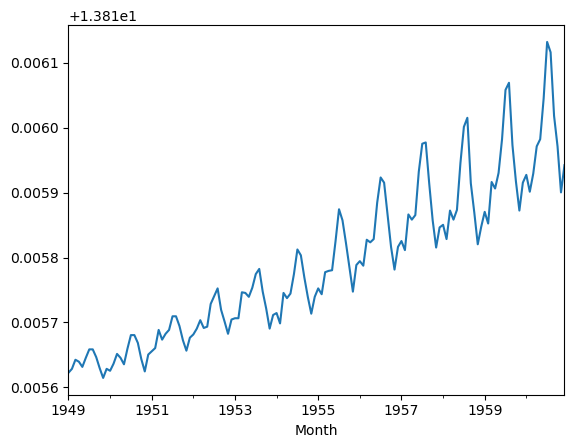

In [439]:
#but okay, if we wanna visualize...
#we wanna plot the actuals:
y_log.plot();
#vs. the forecast
plt.plot(forecast);

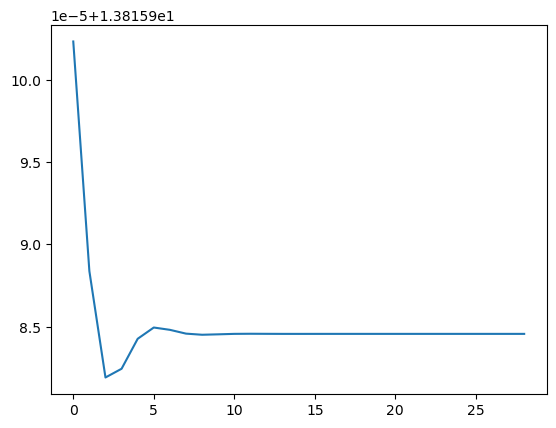

In [441]:
plt.plot(forecast);

In [442]:
#wait, what about the predictions of the ONE-STEP method?!
########################################################
split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

predictions = [] #to hold/store the predicted test points
past = list(train) #starting point for step-wise predictions, one point at a time ###GOTTA HAVE THIS HERE CUZ FOR *EACH* NEW P,D,Q, IT'S GOTTA *RESTART* AT BEING *JUST* THE ORIGINAL TRAINING DATA!!!!!!!! originally mistakenly had it outside loop/above so never reset! was just adding to it!

for i in range(len(test)):#step-wise predicts each, next/one-step-ahead point based on all the others BEFORE it!
    model = ARIMA(past, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
    result = model.fit()#train/fit model on given training data
    next_point_prediction = result.forecast()[0]
    predictions.append(next_point_prediction)
    past.append(test[i])#very important to include this because this sets up the NEXT guy w/ one more additional point for its predict; lol it's the right answer for what we were just tryna predict!

predictions

[13.816002356495192,
 13.81600612097407,
 13.815876475450361,
 13.815875621630369,
 13.815820982260178,
 13.815874024747155,
 13.815885440703651,
 13.815846794745164,
 13.815936148237318,
 13.815896385771666,
 13.815933715214774,
 13.815990072307752,
 13.81606928458762,
 13.81605269740492,
 13.81593139388842,
 13.81590773228191,
 13.81586675527088,
 13.815943380447953,
 13.815936712837816,
 13.815895744833346,
 13.815941505241147,
 13.815981455037946,
 13.815977016982233,
 13.816055323863093,
 13.816144550990767,
 13.816088414563472,
 13.815975962670418,
 13.815973834366302,
 13.815891555531014]

In [ ]:
#noyce!

In [445]:
test

Month
1958-08-01    13.816015
1958-09-01    13.815914
1958-10-01    13.815869
1958-11-01    13.815821
1958-12-01    13.815848
1959-01-01    13.815870
1959-02-01    13.815852
1959-03-01    13.815916
1959-04-01    13.815906
1959-05-01    13.815930
1959-06-01    13.815982
1959-07-01    13.816058
1959-08-01    13.816069
1959-09-01    13.815973
1959-10-01    13.815917
1959-11-01    13.815872
1959-12-01    13.815915
1960-01-01    13.815927
1960-02-01    13.815901
1960-03-01    13.815929
1960-04-01    13.815971
1960-05-01    13.815982
1960-06-01    13.816045
1960-07-01    13.816132
1960-08-01    13.816116
1960-09-01    13.816018
1960-10-01    13.815971
1960-11-01    13.815900
1960-12-01    13.815942
Name: #CigSales, dtype: float64

In [449]:
forecast

array([13.81600236, 13.81598838, 13.8159819 , 13.81598243, 13.81598426,
       13.81598494, 13.8159848 , 13.81598457, 13.8159845 , 13.81598453,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456, 13.81598456,
       13.81598456, 13.81598456, 13.81598456, 13.81598456])

In [455]:
#okay first let's try w/ simple:

#oh wait, i think the issue is we need DATES for forecast

#basically just use the y_log TEST vals, and REPLACE them w/ the FORECAST!

forecast_simple = test.copy()
for i in range(len(test)):
    forecast_simple[i] = forecast[i]
forecast_simple

Month
1958-08-01    13.816002
1958-09-01    13.815988
1958-10-01    13.815982
1958-11-01    13.815982
1958-12-01    13.815984
1959-01-01    13.815985
1959-02-01    13.815985
1959-03-01    13.815985
1959-04-01    13.815985
1959-05-01    13.815985
1959-06-01    13.815985
1959-07-01    13.815985
1959-08-01    13.815985
1959-09-01    13.815985
1959-10-01    13.815985
1959-11-01    13.815985
1959-12-01    13.815985
1960-01-01    13.815985
1960-02-01    13.815985
1960-03-01    13.815985
1960-04-01    13.815985
1960-05-01    13.815985
1960-06-01    13.815985
1960-07-01    13.815985
1960-08-01    13.815985
1960-09-01    13.815985
1960-10-01    13.815985
1960-11-01    13.815985
1960-12-01    13.815985
Name: #CigSales, dtype: float64

In [ ]:
############################################################
#yefffffff! alhamdulillah i think this is it!

array([13.81601543, 13.81591448, 13.81586949, 13.81582051, 13.8158475 ,
       13.81587049, 13.8158525 , 13.81591648, 13.81590648, 13.81593047,
       13.81598245, 13.81605841, 13.8160694 , 13.81597345, 13.81591748,
       13.81587249, 13.81591548, 13.81592747, 13.81590148, 13.81592947,
       13.81597145, 13.81598245, 13.81604541, 13.81613236, 13.81611637,
       13.81601843, 13.81597145, 13.81590048, 13.81594246])

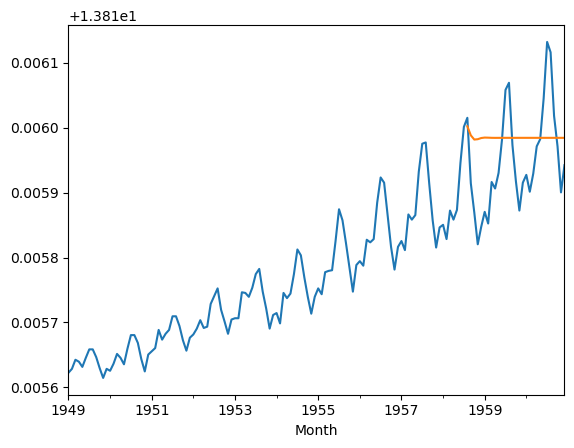

In [457]:
fig,ax = plt.subplots()
y_log.plot(ax=ax)
#vs. the forecast
forecast_simple.plot(ax=ax);

In [459]:
#okay cool aH now let's try our more sophisticated original forecast!
forecast_advanced = test.copy()
for i in range(len(test)):
    forecast_advanced[i] = predictions[i]
forecast_advanced

Month
1958-08-01    13.816002
1958-09-01    13.816006
1958-10-01    13.815876
1958-11-01    13.815876
1958-12-01    13.815821
1959-01-01    13.815874
1959-02-01    13.815885
1959-03-01    13.815847
1959-04-01    13.815936
1959-05-01    13.815896
1959-06-01    13.815934
1959-07-01    13.815990
1959-08-01    13.816069
1959-09-01    13.816053
1959-10-01    13.815931
1959-11-01    13.815908
1959-12-01    13.815867
1960-01-01    13.815943
1960-02-01    13.815937
1960-03-01    13.815896
1960-04-01    13.815942
1960-05-01    13.815981
1960-06-01    13.815977
1960-07-01    13.816055
1960-08-01    13.816145
1960-09-01    13.816088
1960-10-01    13.815976
1960-11-01    13.815974
1960-12-01    13.815892
Name: #CigSales, dtype: float64

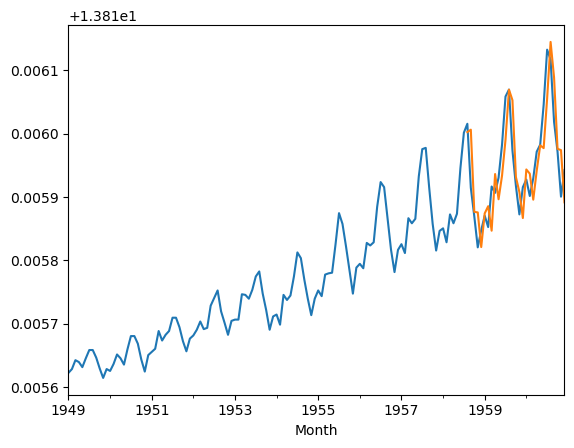

In [460]:
#dropage
fig,ax = plt.subplots()
y_log.plot(ax=ax)
#vs. the forecast
forecast_advanced.plot(ax=ax);

In [469]:
#WOW MASHALLAH VERY NICE!!!!! SO WHY WAS IT GIVING US THAT BAKWAAS AND SCARING US?!?!?!?!?
#but aH lol to know that LUMP forecasting is NOT the way to go!!!! so all that work WAS worth it after all!!!!

#now, we could add on the RETROACTIVE fit too!

split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

model = ARIMA(train, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
fit = model.fit()#train/fit model on given training data
past_predictions = fit.predict() #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!

past_predictions

1949-01-01     0.000000
1949-02-01    13.815623
1949-03-01    13.815630
1949-04-01    13.815646
1949-05-01    13.815636
                ...    
1958-03-01    13.815821
1958-04-01    13.815890
1958-05-01    13.815845
1958-06-01    13.815880
1958-07-01    13.815964
Freq: MS, Name: predicted_mean, Length: 115, dtype: float64

In [ ]:
#oh nice! alread in format we want!!!!

#OH! notice bottom says 'frequency: MS' - GUESSING THAT'S *MONTHS*!!! even tho in equation code thought it was just freq='M'?
#but 'MS' kept showing up in errors and was thinking it had to do w/ MA moving average, but makes sense now cuz also kept seeing
#/getting message of FREQUENCY NOT SPECIFIED SO ASSUMED!!! didn't realize they were/musta been SAMES!

In [479]:
####################################
####ohhhhh shoot though! we could also do back predictions
#as/from the FULL/WHOLE dataset like we did in noob best fit!

#no need for train/test split obvy!

model_full = ARIMA(y_log, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
fit_full = model_full.fit()#train/fit model on given training data
past_predictions_full = fit_full.predict() #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!

past_predictions_full

1949-01-01     0.000000
1949-02-01    13.815623
1949-03-01    13.815630
1949-04-01    13.815644
1949-05-01    13.815637
                ...    
1960-08-01    13.816143
1960-09-01    13.816082
1960-10-01    13.815968
1960-11-01    13.815961
1960-12-01    13.815891
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

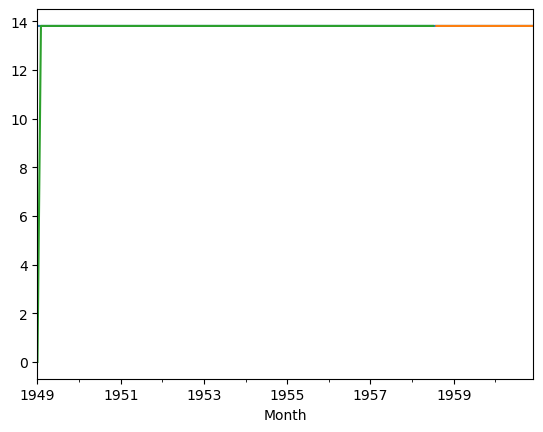

In [472]:
fig,ax = plt.subplots()
#actuals
y_log.plot(ax=ax)
#forecast
forecast_advanced.plot(ax=ax)
#'retroactive' forecast aka *BE*FOREcast! ;P
past_predictions.plot(ax=ax);

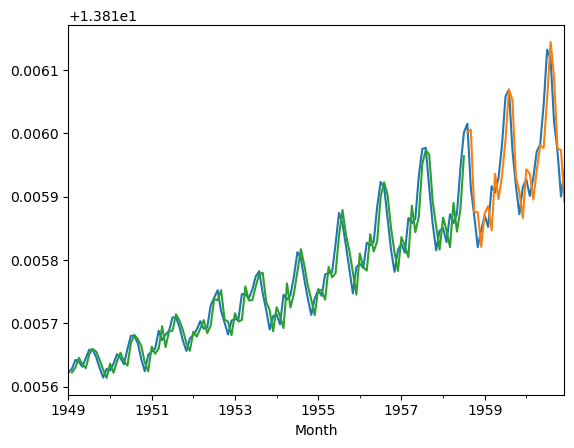

In [480]:
#oh, ubb - actually i think we saw this / this was why they start at like the 2nd/3rd point, index[2]?!?!?!
##############################################################################################################
fig,ax = plt.subplots()
#actuals
y_log.plot(ax=ax)
#forecast
forecast_advanced.plot(ax=ax)
#'retroactive' forecast aka *BE*FOREcast! ;P
past_predictions[1:].plot(ax=ax);

In [ ]:
#SUBHANALLAH WA BI HAMDI SUBHANALLAHIL 'AUDHEEM!!!!!!!!!

In [ ]:
#would be good to add color legend

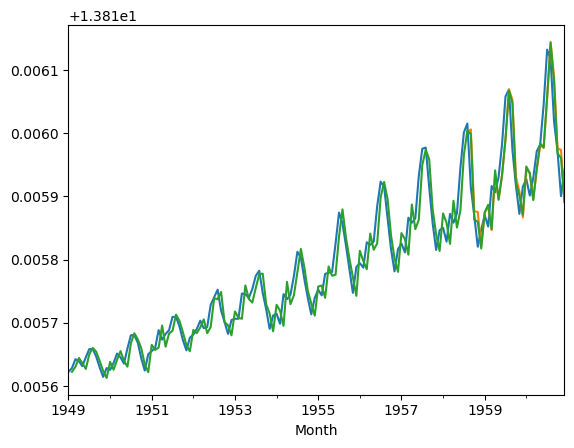

In [485]:
#W/FULL!
#this would let us see the best fit for the WHOLE, so here,
#wouldn't make alotta sense to also look at the TEST predictions aka FORECASTS one-steps too
#occluded anyway!

fig,ax = plt.subplots()
#actuals
y_log.plot(ax=ax)
#forecast
forecast_advanced.plot(ax=ax)
#full fit
past_predictions_full[1:].plot(ax=ax);

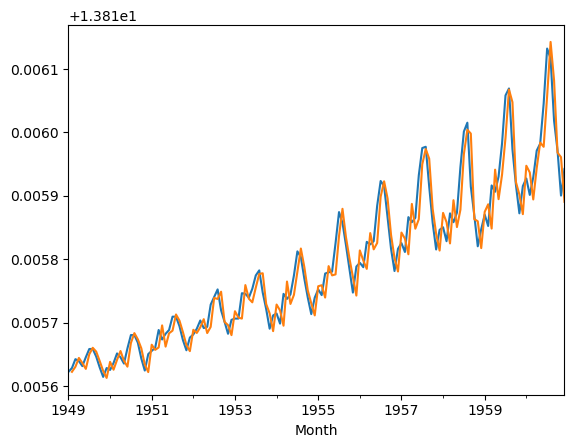

In [486]:
#here it is without test predictions
#W/FULL!

fig,ax = plt.subplots()
#actuals
y_log.plot(ax=ax)
#full fit
past_predictions_full[1:].plot(ax=ax);

In [ ]:
#Alhamdulillahi Rabbil 'Aalameen!

In [ ]:
#NOTE that w/ one-step NON-lump forecast we CAN'T go into the future indefinitely, only - obvy - ONE step further than past!
#lump forecasting can be used for beyond that. OH! maybe it makes sense that lump straightens out to STRAIGHT LINE really quick
#CUZ TOO MUCH UNCERTAINTY!!! like we talked about! - think it's that thing! too difficult to predict SPECIFICS but/so can only predict
#basically moving AVERAGE! or like not even moving lol just like overall 'future' average - remember encountering this

################################################################################################################################

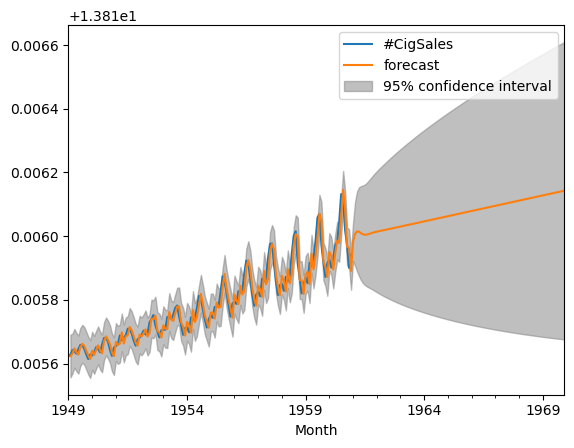

In [464]:
#now lets go back to the orignal idea of plot predict!

#so wait, w/ plot_predict we CAN predict out into future for where we don't have data - so like here for our 1961-1970 period...
#BUT SO WE *DON'T* HAVE TO USE 'LUMP FORECAST' THEN?!?!!?


model = ARIMA(y_log, trend='t', order=(2,1,1))
fit = model.fit()
fig, ax = plt.subplots()
y_log.plot(ax=ax) #actuals
plot_predict(fit, start='1949-02-01', end='1969-12-01', ax=ax)#, freq='M') #predictions #can choose to BACK predict too, or we can use our house .predict()?!
plt.show() #need this or else duplicates for some reason?? maybe cuz subplots?

In [ ]:
#hmmm, could we have just used plot_predict off of training fit to give us predictions in test, like for last section?
#or would that have been like using LUMP forecast?

In [ ]:
#we can of course take out the BEFOREcast lol if we want
#but yeah this is basically just a TRENDLINE up!!!!
#it's like it's CONTINUING the moving average line!!! AKA JUST LIKE A BEST FIT!!!!!!!
#could add trendline over existing/actuals/'to-date'
##########################################################################################

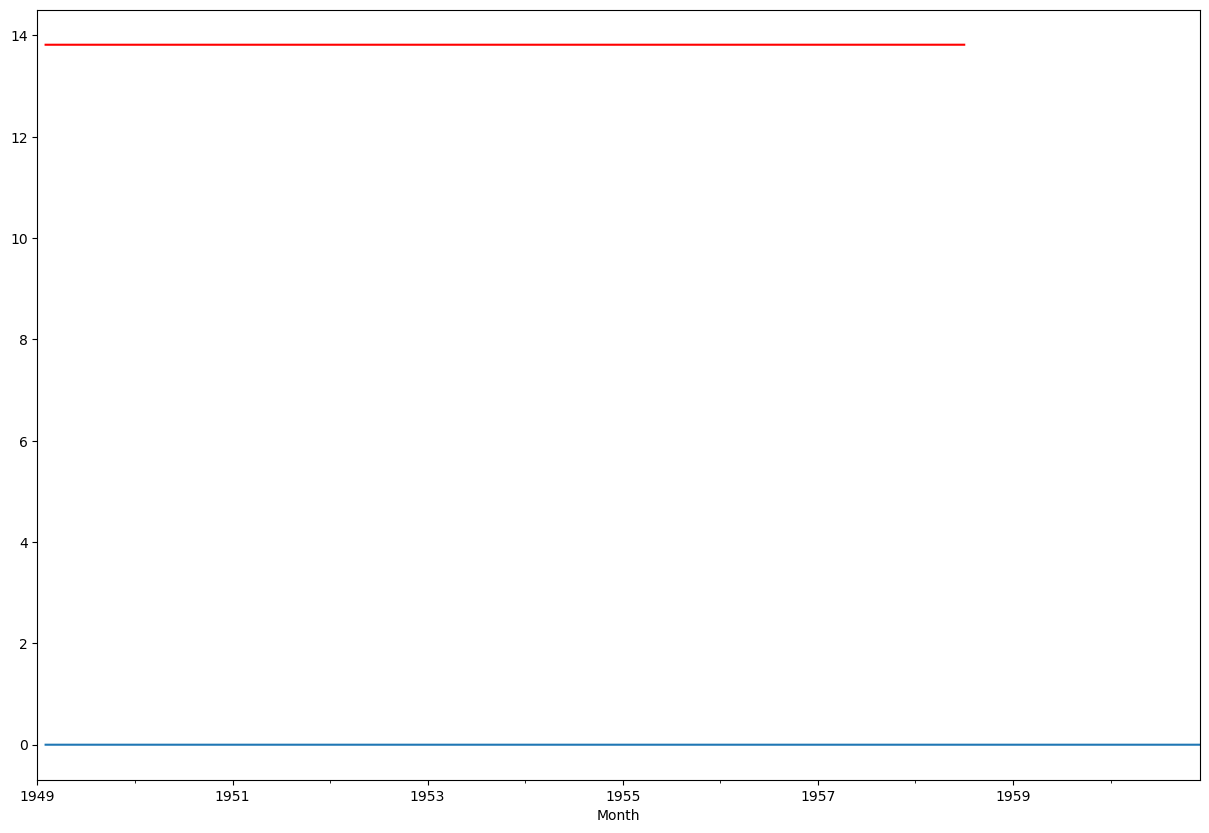

In [475]:
#oh interesting! they also plotted the WHITE NOISE, aka DIFF'D data!
plt.figure(figsize=(15,10))
y_log.diff().plot()
# plt._ _ _(model_fit.predict(), color = 'red')
past_predictions[1:].plot(c='r'); #oh yeah lol better take out 1st!

In [ ]:
#oh wait yeah... what are they thinking putting DIFFERENCES on here?! totally different SCALE!!!
#unless maybe we go back to NON-logged, but think that'll be same thing. would have to redo everything as that
#oh wait no, couldn't be cuz they themselves show it's Y_LOG.DIFF()!!!!!!

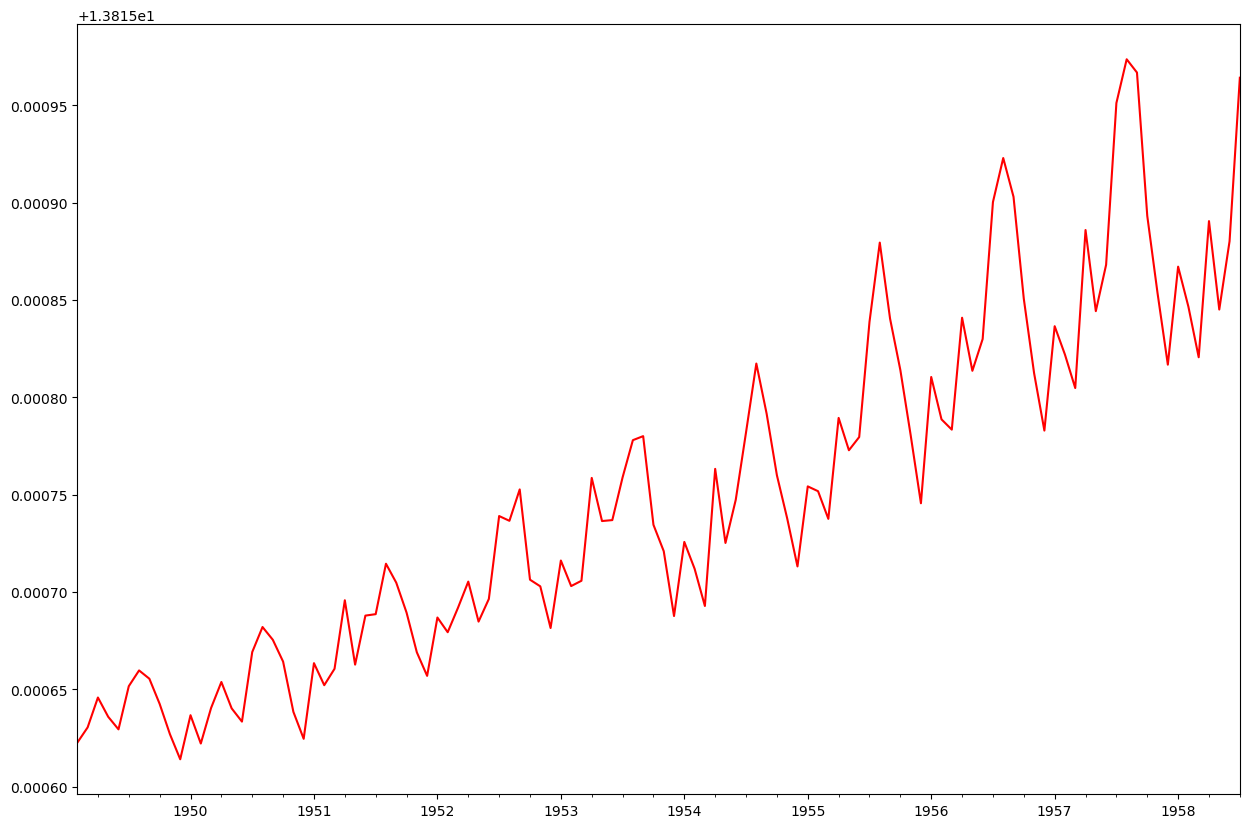

In [476]:
#better we look at these SEPARATELY!
#oh interesting! they also plotted the WHITE NOISE, aka DIFF'D data!
plt.figure(figsize=(15,10))
past_predictions[1:].plot(c='r'); #oh yeah lol better take out 1st!

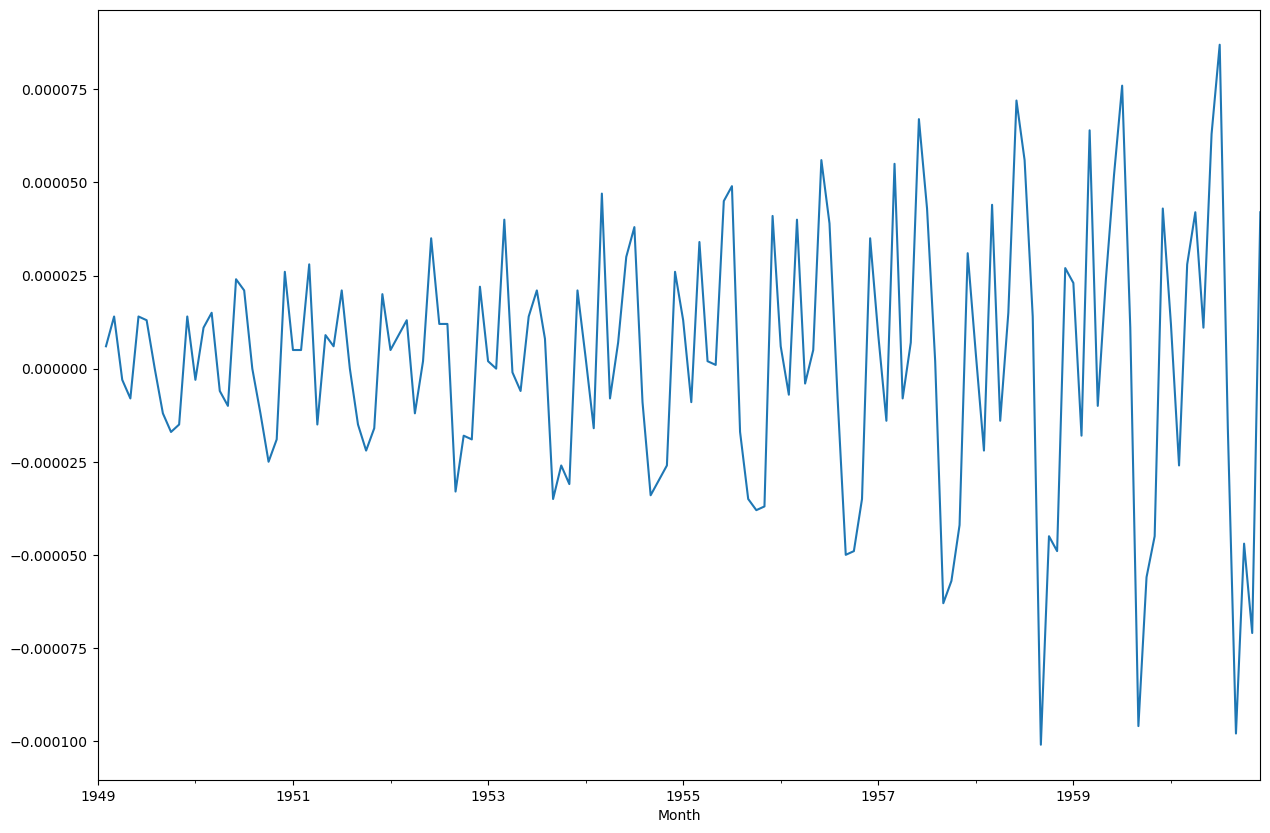

In [478]:
plt.figure(figsize=(15,10))
y_log.diff().plot();

In [ ]:
#so yeah, weird they'd have us put diffs on same plot?

#funny they don't even USE their lump forecast here!!! but i guess not looking ahead yet... that's prob next

#but lol they didn't even plot the back_predictions against the ACTUALS!!!

### 3f. Application: Forecasting

We've done well: our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

In [471]:
#hain? what are they basing that off of? AIC/BAIC? "la baik..." lol, only for ALLAH!
#but to see this w/ MSE, we could do w/ PREDICTIONS right?!
########################################################################################################################
split = int(.8*len(y))
train, test = y_log[:split], y_log[split:]

model = ARIMA(train, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
fit = model.fit()#train/fit model on given training data
past_predictions = fit.predict() #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!
mean_squared_error(train,past_predictions)

1.6597515353314025

In [430]:
#hmmm, isn't that like actually pretty bad? like compared to the other ones that had mse's of e-9??????
########################################################################################################################
predictions

1949-01-01     0.000000
1949-02-01    20.723434
1949-03-01    13.815635
1949-04-01    13.815655
1949-05-01    13.815627
                ...    
1958-03-01    13.815823
1958-04-01    13.815903
1958-05-01    13.815833
1958-06-01    13.815904
1958-07-01    13.815988
Freq: MS, Name: predicted_mean, Length: 115, dtype: float64

In [487]:
#oh that was only for train portion, but we could see how we do w/ FULL fit
#hain? what are they basing that off of? AIC/BAIC? "la baik..." lol, only for ALLAH!
#but to see this w/ MSE, we could do w/ PREDICTIONS right?!
########################################################################################################################

#same as original, copied here!

model_full = ARIMA(y_log, order=(2,1,1))#set up model, w/ pdq order params, and data to be trained on WHICH WILL BE UPDATED WITH +1 MORE/RECENT/LAST POINT in each of these sub-iterations aka for each pdq combo, representing for each new point to be predicted!
fit_full = model_full.fit()#train/fit model on given training data
past_predictions_full = fit_full.predict() #TURNS OUT YOU *DON'T* NEED THE EXTRA '[0]' ON END LIKE THEY DID!!!! ANOTHER EXAMPLE OF THEIR CONFUSING UNNECESSARY *WASTE*!!!!!

mean_squared_error(y_log,past_predictions_full)

1.3254960181789972

In [ ]:
#hmmm okay, still not that great, though better

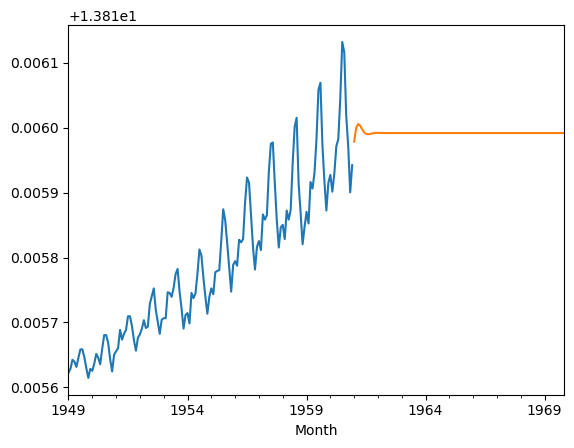

In [488]:
#okay so now they're talking about future forecasting. we already did
#again, can't 

#so we could do the 2,1,1 LUMP forecast for comparo?

lump_forecast = fit_full.forecast(107) #i think that's right #months we're looking to forecast

fig,ax = plt.subplots()
y_log.plot(ax=ax)
#vs. the forecast
lump_forecast.plot(ax=ax);

In [ ]:
#khe khe khe - kinda boring, flat lol. seen

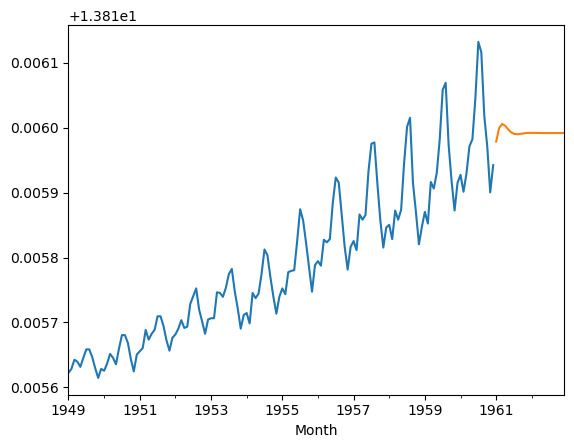

In [489]:
#THEIRS / ONLY 2 YEARS!

#okay so now they're talking about future forecasting. we already did
#again, can't 

#so we could do the 2,1,1 LUMP forecast for comparo?

small_forecast = fit_full.forecast(24)

fig,ax = plt.subplots()
y_log.plot(ax=ax)
#vs. the forecast
small_forecast.plot(ax=ax);

In [ ]:
#oh... hmmm, the line looks like the same exact levelling-out/equilibrium line... thought maybe it'd be lower cuz thought like the line
#represents the AVERAGE over that period!!!
############################################################################################################################################

In [ ]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast

#so like Jan 1961 to Dec 1969

# Convert that range into a dataframe that includes your predictions
#make df out of this date range & lump predictions like we just did^, then shove the datetimes into/as INDEX!

# Plot your future predictions
#above

In [ ]:
#BUT WHY DIDN'T THEY USE THE BUILT-IN PLOT_PREDICT?!?

#okay so they only made lump forecast intending to / for FUTURE predictions, but yeah, that's what we use LUMP for!
#but lump is just STRAIGHT like avg/single value basically while plot_predict gives us a MOVING AVG continuation/'best fit line'!!!!

## 4. Evaluating and Concluding

Our model captures the centre of a line that's increasing at a remarkable rate. Cowboy Cigarettes sell more cigarettes in the summer, perhaps due to the good weather, disposable income and time off that people enjoy, and the least in the winter, when people might be spending less and enjoying less free time outdoors. 

Remarkably, our ARIMA model made predictions using just one variable. We can only speculate, however, on the causes of the behaviour predicted by our model. We should also take heed that spikes in data, due to sudden unusual circumstances like wars, are not handled well by ARIMA; and the outbreak of the Vietnam War in the 1960s would likely cause our model some distress.  

We could suggest to our employers that, if they are interested in discovering the causes of the cigarette sales trajectory, they execute a regression analysis in addition to the time series one. 

In [ ]:
#okay so yeah this/THEIR simple way is basically just the AVERAGE line for i guess what's expected over the next 10 years!
#oh, but from plotting BOTH their 2 year and my 10 year lump forecast, line levels look same??

#but yeah aH they agree w/ my reasoning! summer weather/winter cold etc. but interesting thought about perhaps more/less spending/disposable income,
#i'd say based on *MOOD*! sun = feel good/good mood = spend more :D does marketing exploit this??

#yeah and all this again was just from ONE VARIABLE!!!!! just the target variable ITSELF!!!! like how in gdata simplest way to go
#when in doubt for prediction, JUST GO W/ FOR THE *AVERAGE*!!!
#but clearly this isn't the OVERALL average, but maybe like the average of the *LAST *YEAR**?!?!??!!?!?
######################################################################################################

#"We could suggest to our customers that, if they are interested in discovering the causes of the cigarette sales trajectory,
#they execute a regression analysis in addition to the time series one."